# Часть 1: Исследование данных и обработка данных для проведения последующей сегментации

# Исследуем распределения по данным:





**№1** Рассчитываем кол-во уникальных значений, нулевых и пустых значений + доля в % от общего кол-ва

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/HW1_var_19.csv', sep=';')
data_mart = pd.read_csv('/content/HW1_var_19.csv', sep=';')

# удалим неинфомативные признаки
df.drop(['Номер варианта', 'ID'], axis=1, inplace=True)
data_mart.drop(['Номер варианта'], axis=1, inplace=True)


df.head()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,Форма банка (без печати работодателя),Ремонт,1.0,0.18,мужской,1.0,0,высшее,специалист,< 50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Покупка автомобиля,0.0,NaN,мужской,0.0,0,Высшее/Второе высшее/Ученая степень,другое,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Форма банка (без печати работодателя),Ремонт,1.0,0.49,женский,0.0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,...,0.0,26.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Поступление зарплаты на счет,Ремонт,1.0,0.54,женский,0.0,0,высшее,специалист,>250,...,0.0,18.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Свободная форма с печатью работодателя,Ремонт,1.0,0.31,мужской,0.0,0,высшее,менеджер высшего звена,>250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# подсчет количества нулей для каждого столбца

df_zeros = pd.DataFrame((df == 0).astype(int).sum(axis=0)).reset_index()
df_zeros.columns=['column', 'count_zeros']
df_zeros.head()

,column,count_zeros
0,INCOME_BASE_TYPE,0
1,CREDIT_PURPOSE,0
2,INSURANCE_FLAG,4037
3,DTI,0
4,SEX,0


In [ ]:
# подсчет уникальных значений для каждого столбца

df_unique = pd.DataFrame(df.nunique()).reset_index()
df_unique.columns = ['column', 'count_unique']
df_unique.head()

,column,count_unique
0,INCOME_BASE_TYPE,4
1,CREDIT_PURPOSE,10
2,INSURANCE_FLAG,2
3,DTI,60
4,SEX,2


In [ ]:
# подсчет пропущенных значений для каждого столбца

df_nan = pd.DataFrame(df.isnull().sum()).reset_index()
df_nan.columns = ['column', 'count_nan']
df_nan.head()

,column,count_nan
0,INCOME_BASE_TYPE,73
1,CREDIT_PURPOSE,0
2,INSURANCE_FLAG,1
3,DTI,106
4,SEX,0


In [ ]:
# создадим новый датафрейм с результатами расчетов

count_rows = df.shape[0]

df_res = pd.DataFrame()
df_res['column'] = df.columns

df_res['count_unique'] = df_unique['count_unique']
df_res['count_unique_%'] = df_unique['count_unique'] / count_rows * 100

df_res['count_nan'] = df_nan['count_nan']
df_res['count_nan_%'] = df_nan['count_nan'] / count_rows * 100

df_res['count_zeros'] = df_zeros['count_zeros']
df_res['count_zeros_%'] = df_zeros['count_zeros'] / count_rows * 100

df_res

,column,count_unique,count_unique_%,count_nan,count_nan_%,count_zeros,count_zeros_%
0,INCOME_BASE_TYPE,4,0.039055,73,0.712751,0,0.000000
1,CREDIT_PURPOSE,10,0.097637,0,0.000000,0,0.000000
2,INSURANCE_FLAG,2,0.019527,1,0.009764,4037,39.416130
3,DTI,60,0.585823,106,1.034954,0,0.000000
4,SEX,2,0.019527,0,0.000000,0,0.000000
5,FULL_AGE_CHILD_NUMBER,6,0.058582,2,0.019527,6072,59.285296
6,DEPENDANT_NUMBER,4,0.039055,0,0.000000,10206,99.648506
7,EDUCATION,9,0.087873,1,0.009764,0,0.000000
8,EMPL_TYPE,9,0.087873,10,0.097637,0,0.000000
9,EMPL_SIZE,8,0.078110,105,1.025190,0,0.000000


**Комментарий:**

1. По количеству пропусков признаки можно разделить на группы:

*   Пропуски составляют около 1% (id: 0-9)
*   Пропуски составляют равное количество 22.7% (id: 10-13)
*   Пропуски составляют равное количество 60.9% (id: 14-15)
*   Пропуски составляют равное количество 61.2% (id: 16-20)
*   Пропуски составляют равное количество 63.4% (id: 21-41)


2. При рассмотрении нулевых значений у признаков можно заметить, что:

*   *INSURANCE_FLAG*: 39.4% заемщиков не были застрахованы
*   *FULL_AGE_CHILD_NUMBER*: у 59.2% заемщиков полный возраст детей 0 лет
*   *DEPENDANT_NUMBER*: 99.6% заещиков не имеют иждивенцев
*   *BANKACCOUNT_FLAG*: 60.7% заещиков не имеют онлайн кабинета в банке





**№2** Среднее значение, медиана, стандартное отклонение, минимум, максимум, тип данных по каждому показателю в предоставленных данных

In [ ]:
# воспользуемся решением из "коробки"

df.describe().T

,count,mean,std,min,25%,50%,75%,max
INSURANCE_FLAG,10241.0,0.605800,0.488702,0.00,0.000000,1.000000,1.000000,1.000000
DTI,10136.0,0.387198,0.137724,0.01,0.280000,0.410000,0.490000,0.630000
FULL_AGE_CHILD_NUMBER,10240.0,0.556445,0.762010,0.00,0.000000,0.000000,1.000000,5.000000
DEPENDANT_NUMBER,10242.0,0.004882,0.090435,0.00,0.000000,0.000000,0.000000,3.000000
BANKACCOUNT_FLAG,7909.0,0.384625,0.867555,0.00,0.000000,0.000000,0.000000,4.000000
Period_at_work,7909.0,65.955873,65.962227,5.00,20.000000,44.000000,86.000000,481.000000
age,7909.0,36.277279,8.672649,23.00,29.000000,35.000000,42.000000,62.000000
max90days,3964.0,1.576186,1.833052,0.00,0.000000,1.000000,2.000000,23.000000
max60days,3964.0,1.121090,1.530073,0.00,0.000000,1.000000,1.000000,22.000000
max30days,3964.0,0.812563,1.266599,0.00,0.000000,0.000000,1.000000,21.000000


**№3** Исследуем распределение данных по полу, возрасту и другим категориальным показателям

In [ ]:
# посмотрим на типы данных
# заметим, что категориальный признак может так же "спрятаться" за числовым
# определить такие признаки поможет описание признаков и df_res, полученный в задани №1

df.dtypes

INCOME_BASE_TYPE          object
CREDIT_PURPOSE            object
INSURANCE_FLAG           float64
DTI                      float64
SEX                       object
FULL_AGE_CHILD_NUMBER    float64
DEPENDANT_NUMBER           int64
EDUCATION                 object
EMPL_TYPE                 object
EMPL_SIZE                 object
BANKACCOUNT_FLAG         float64
Period_at_work           float64
age                      float64
EMPL_PROPERTY             object
EMPL_FORM                 object
FAMILY_STATUS             object
max90days                float64
max60days                float64
max30days                float64
max21days                float64
max14days                float64
avg_num_delay            float64
if_zalog                 float64
num_AccountActive180     float64
num_AccountActive90      float64
num_AccountActive60      float64
Active_to_All_prc        float64
numAccountActiveAll      float64
numAccountClosed         float64
sum_of_paym_months       float64
all_credit

In [ ]:
# категориальные признаки типа object

categ_features_obj = list(df.select_dtypes(include='object').columns)

categ_features_obj

['INCOME_BASE_TYPE',
 'CREDIT_PURPOSE',
 'SEX',
 'EDUCATION',
 'EMPL_TYPE',
 'EMPL_SIZE',
 'EMPL_PROPERTY',
 'EMPL_FORM',
 'FAMILY_STATUS']

In [ ]:
# функция для отображения значений, которая принмиает категориальная переменная, и количества

def features_values(feture, df):
  feature_data = df[feature].copy()
  feature_data.fillna('Nan', inplace=True)

  print(f"Признак: {feture}")
  print(feature_data.value_counts())
  print('\n')


In [ ]:
# рассмотрим, сколько раз встречается каждое значение категориального признака типа object

for feature in categ_features_obj:
  features_values(feature, df)

Признак: INCOME_BASE_TYPE
2НДФЛ                                     3242
Поступление зарплаты на счет              3102
Форма банка (без печати работодателя)     2946
Свободная форма с печатью работодателя     879
Nan                                         73
Name: INCOME_BASE_TYPE, dtype: int64


Признак: CREDIT_PURPOSE
Ремонт                                 5606
Покупка автомобиля                     1807
Покупка недвижимости/ строительство    1406
Отпуск                                  386
Другое                                  346
Покупка мебели                          195
Покупка бытовой техники                 140
Покупка земли                           132
Обучение                                124
Лечение                                 100
Name: CREDIT_PURPOSE, dtype: int64


Признак: SEX
мужской    5641
женский    4601
Name: SEX, dtype: int64


Признак: EDUCATION
высшее                                 5844
среднее-специальное                    1719
Высшее/Второе высшее/

In [ ]:
# функция для отрисовки распределения, пропущенные значения отобразим как Nan


def plot_distribution(features, df):
    sns.set(style="whitegrid")

    for feature in features:
        feature_data = df[feature].copy()

        feature_data.fillna('Nan', inplace=True)

        plt.figure(figsize=(10, 4))
        sns.countplot(x=feature_data)
        plt.title(f'Гистограмма для признака: {feature}')
        plt.xticks(rotation=90)
        plt.show()
        print('\n')


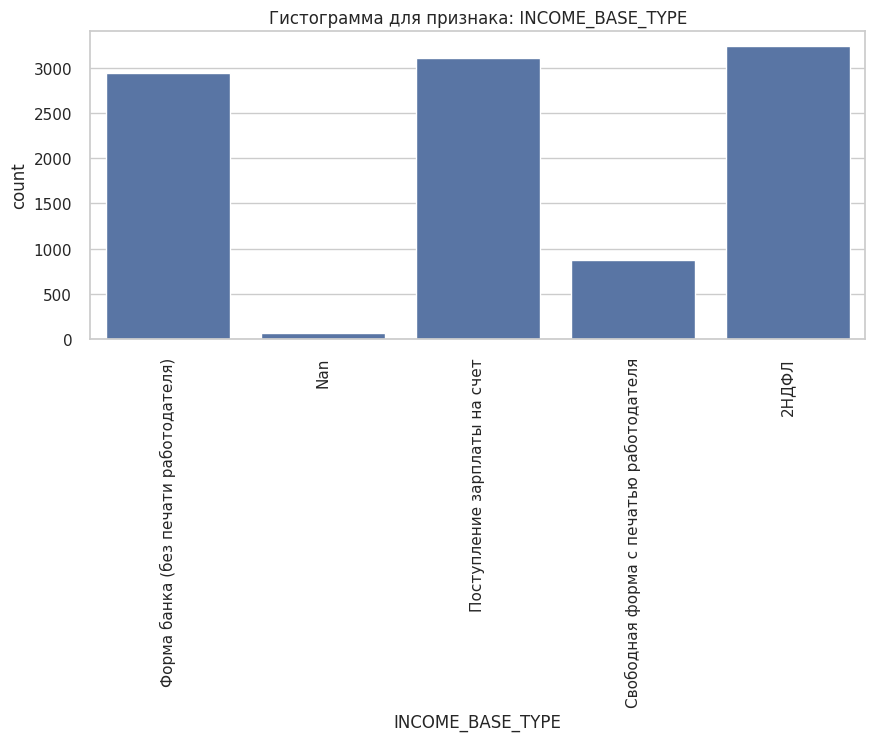

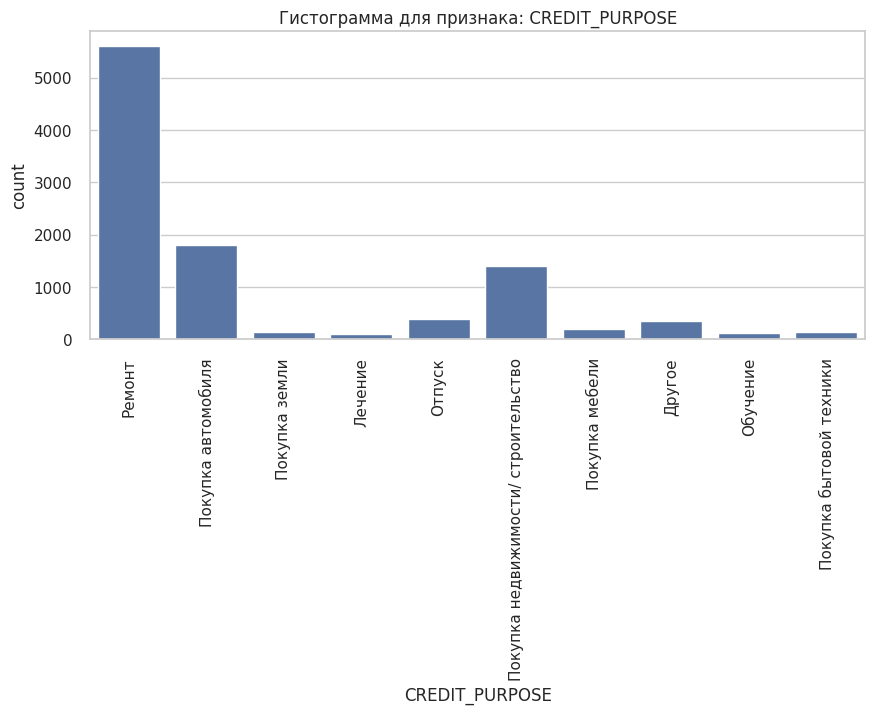

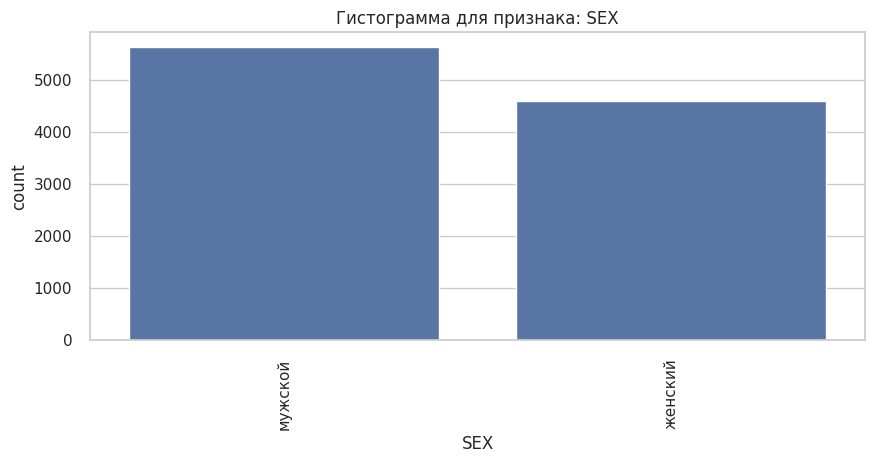

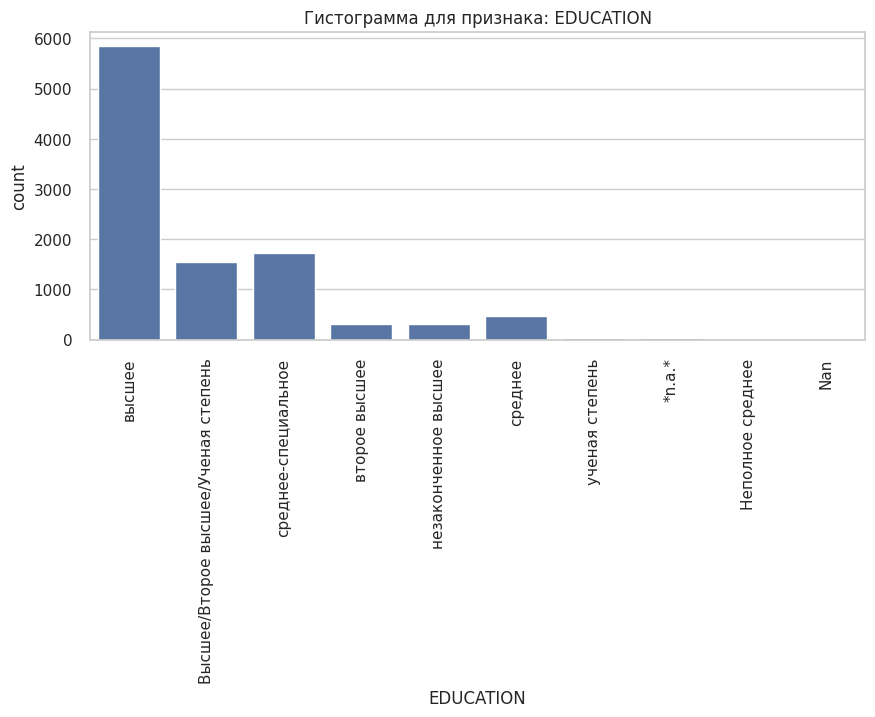

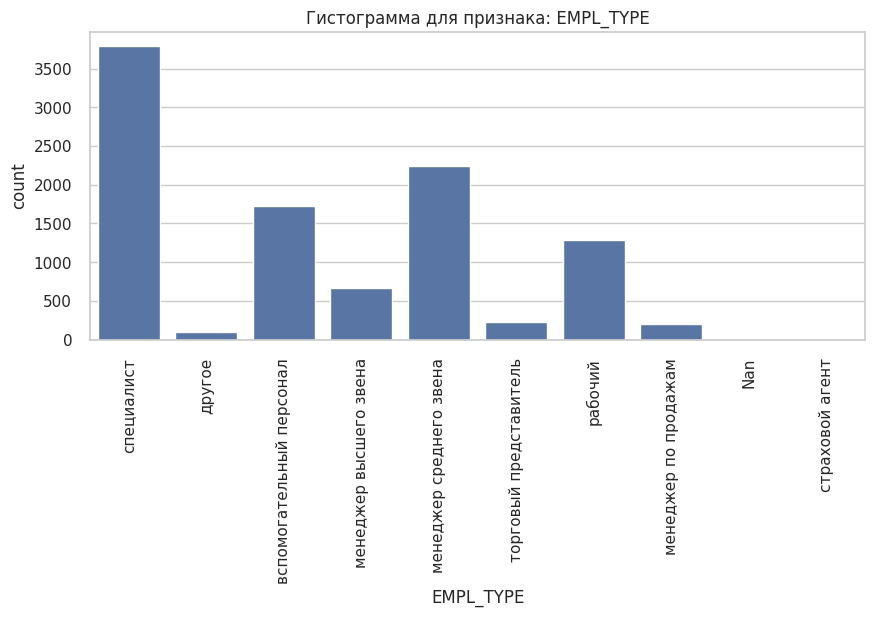

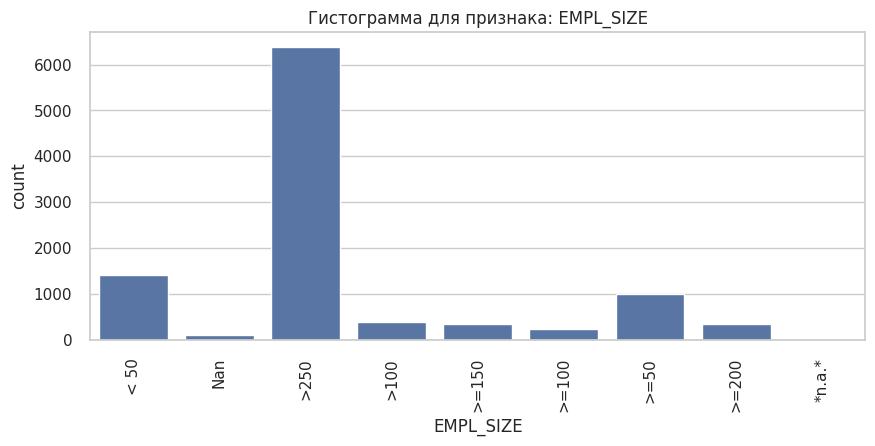

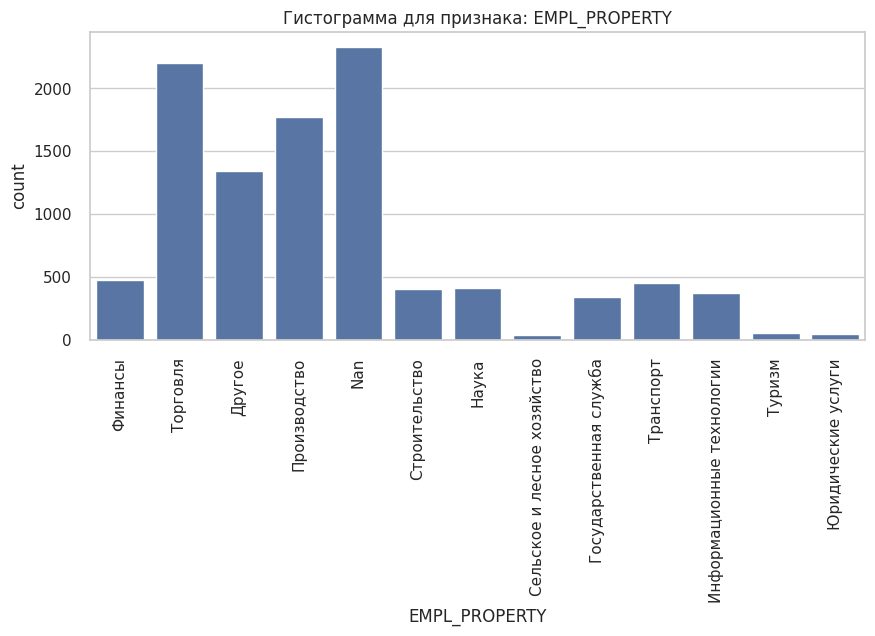

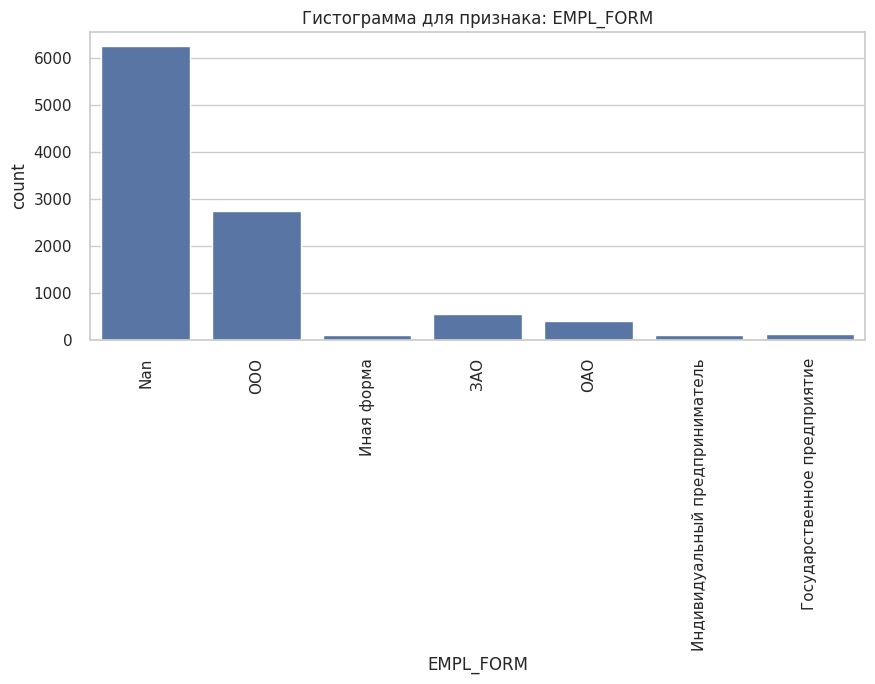

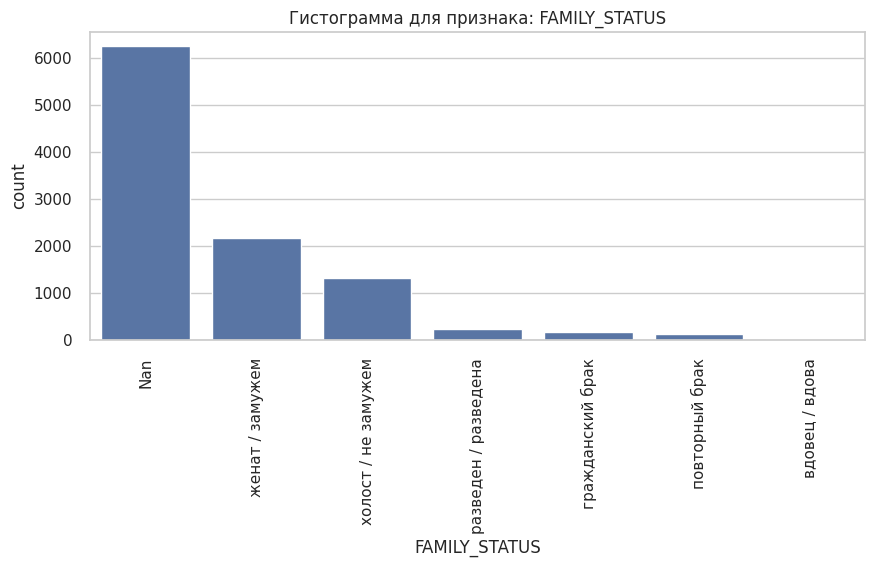

In [ ]:
# отрисуем распределение каждого категориального object признака

plot_distribution(categ_features_obj, df)


**Комментарий**:

* INCOME_BASE_TYPE: свободная форма является самым непопулярным
способом подтверждения дохода, 73 пропуска.
* CREDIT_PURPOSE: наибольшее количество заявок было с целью получить деньги для ремонта, пропусков нет.
* SEX: мужчины и женщины представлены примерно в равных пропорциях, пропусков нет.
* EDUCATION: лидирует высшее образование, 1 пропуск и 30 значений "*n.a.*".
* EMPL_TYPE: представлены различные виды профессий в разном количестве, 10 пропусков.
* EMPL_SIZE: значительный перевес у значения ">250", 105 пропусков и 5 значений "*n.a.*", схожие записи ">100" и ">=100".
* EMPL_PROPERTY: представлены различные сфера бизнеса в различных объемах, 2333 пропуска, что составляет 22% от всех записей.

Признаки с существенным количеством пропусков:

* EMPL_FORM: 6241 пропуск, что составялет 60% от всего количества записей.
* FAMILY_STATUS: 6241 пропуск, что составялет 60% от всего количества записей.

In [ ]:
# другие категориальные признаки, которые представлены числом

categ_features_float = ['dlq_exist',
                        'thirty_in_a_year',
                        'sixty_in_a_year',
                        'ninety_in_a_year',
                        'thirty_vintage',
                        'sixty_vintage',
                        'ninety_vintage',
                        'if_zalog',
                        'INSURANCE_FLAG',
                        'BANKACCOUNT_FLAG']


In [ ]:
# рассмотрим, сколько раз встречается каждое значение у числовых категориальных признаков

for feature in categ_features_float:
  features_values(feature, df)

Признак: dlq_exist
Nan    6503
1.0    2103
0.0    1636
Name: dlq_exist, dtype: int64


Признак: thirty_in_a_year
Nan    6503
0.0    3196
1.0     543
Name: thirty_in_a_year, dtype: int64


Признак: sixty_in_a_year
Nan    6503
0.0    3427
1.0     312
Name: sixty_in_a_year, dtype: int64


Признак: ninety_in_a_year
Nan    6503
0.0    3513
1.0     226
Name: ninety_in_a_year, dtype: int64


Признак: thirty_vintage
Nan    6503
0.0    3629
1.0     110
Name: thirty_vintage, dtype: int64


Признак: sixty_vintage
Nan    6503
0.0    3690
1.0      49
Name: sixty_vintage, dtype: int64


Признак: ninety_vintage
Nan    6503
0.0    3681
1.0      58
Name: ninety_vintage, dtype: int64


Признак: if_zalog
Nan    6503
0.0    2540
1.0    1199
Name: if_zalog, dtype: int64


Признак: INSURANCE_FLAG
1.0    6204
0.0    4037
Nan       1
Name: INSURANCE_FLAG, dtype: int64


Признак: BANKACCOUNT_FLAG
0.0    6224
Nan    2333
1.0    1008
3.0     674
4.0       3
Name: BANKACCOUNT_FLAG, dtype: int64




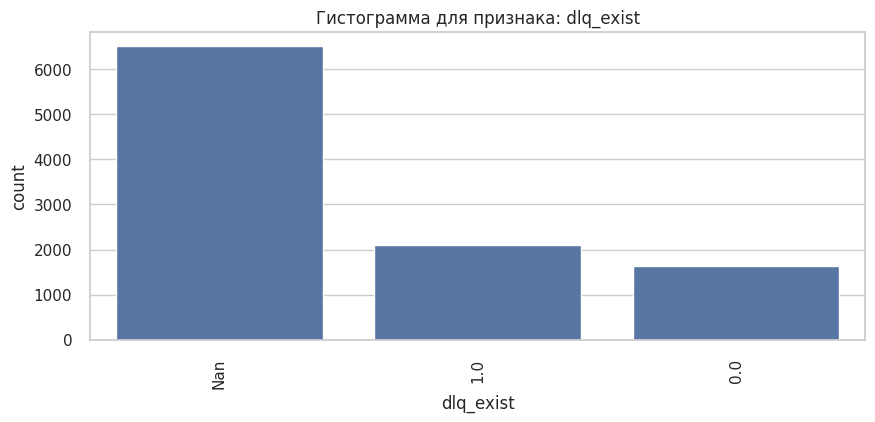

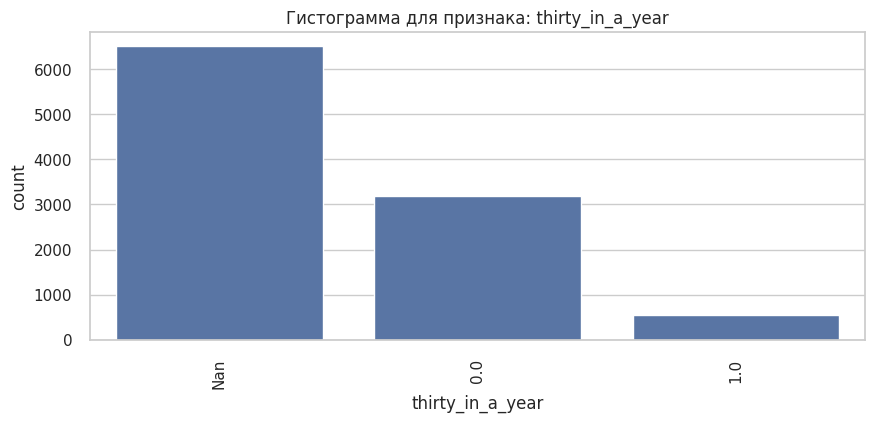

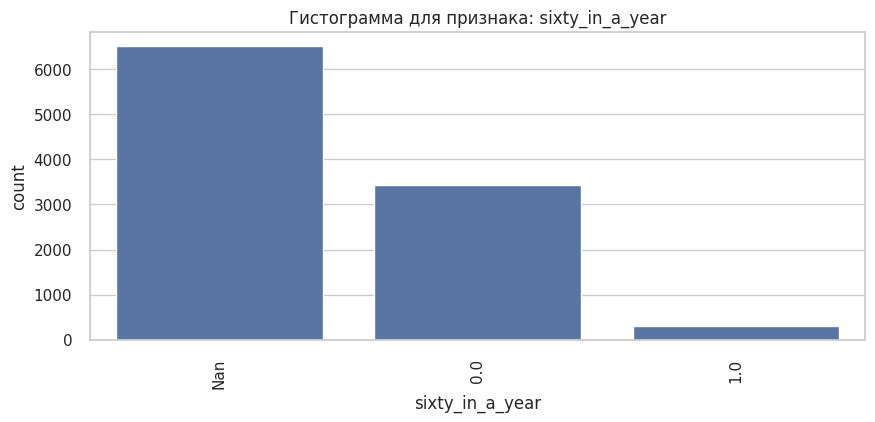

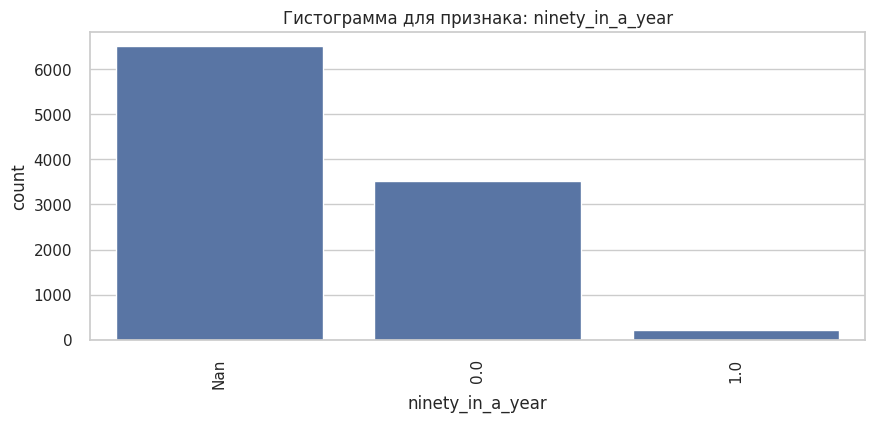

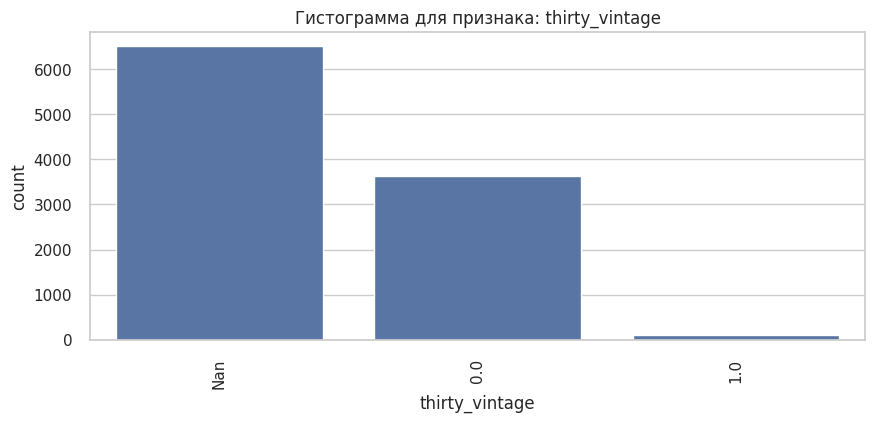

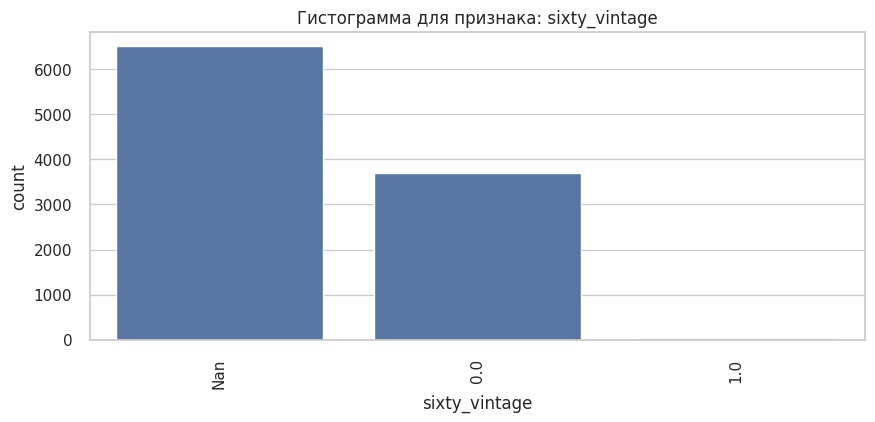

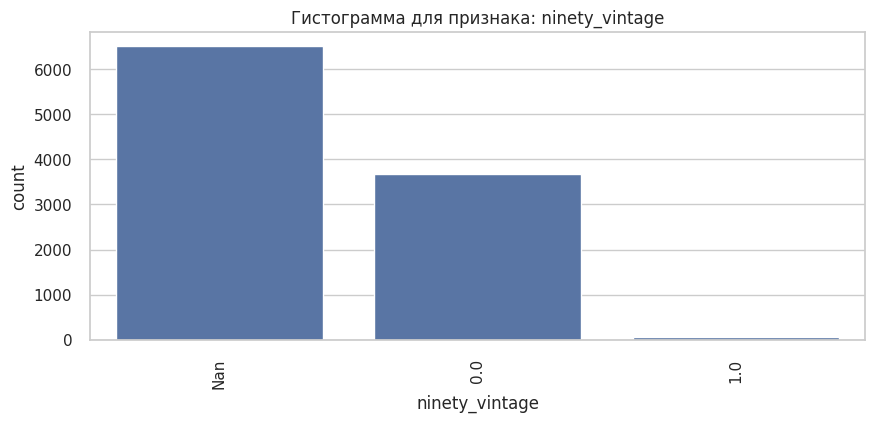

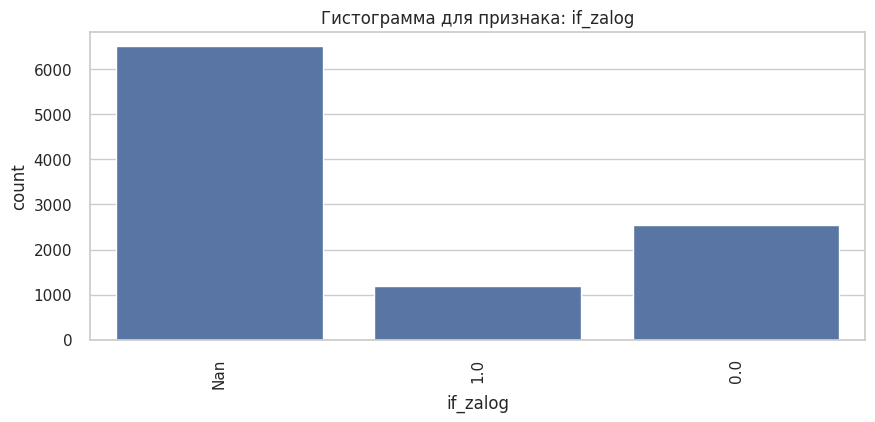

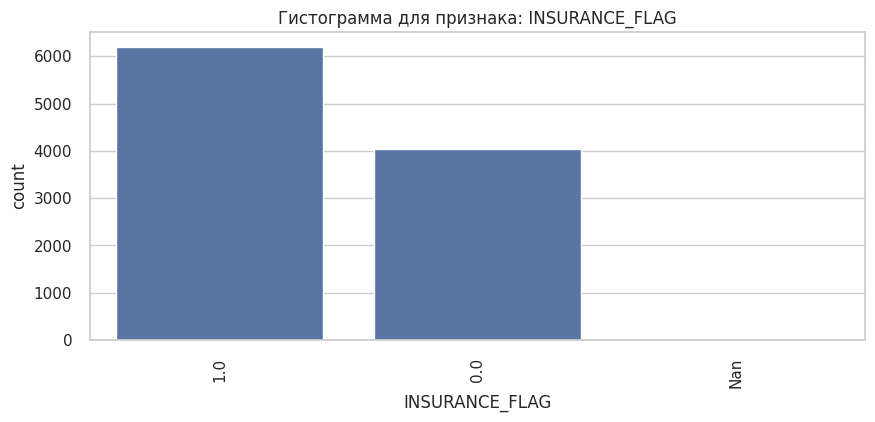

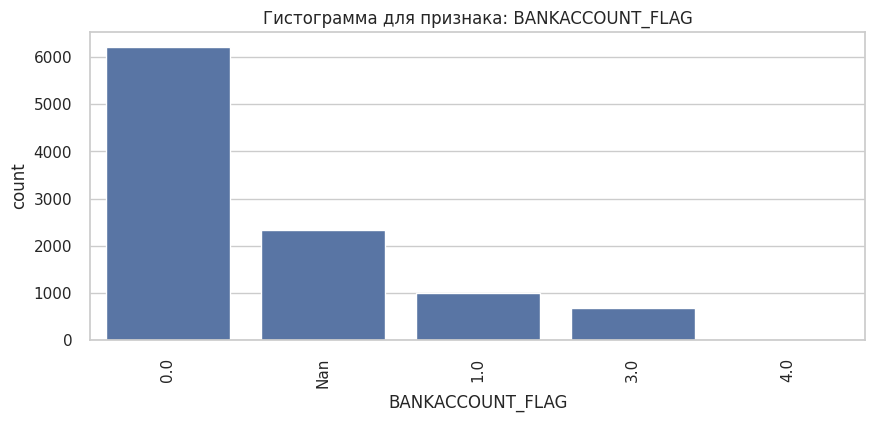

In [ ]:
# отрисуем распределение каждого категориального признака, который представлен числом

plot_distribution(categ_features_float, df)

**Комментарий:**

Для всех переменных в списке *categ_features_float* пропуски составляют >60%, за исключением признаков: *INSURANCE_FLAG* (1 пропуск) и *BANKACCOUNT_FLAG* (2333 пропуск, что сотавляет 22.7%). Значения *BANKACCOUNT_FLAG* не соответсвуют описанию признака в таблице с описанием признаков.

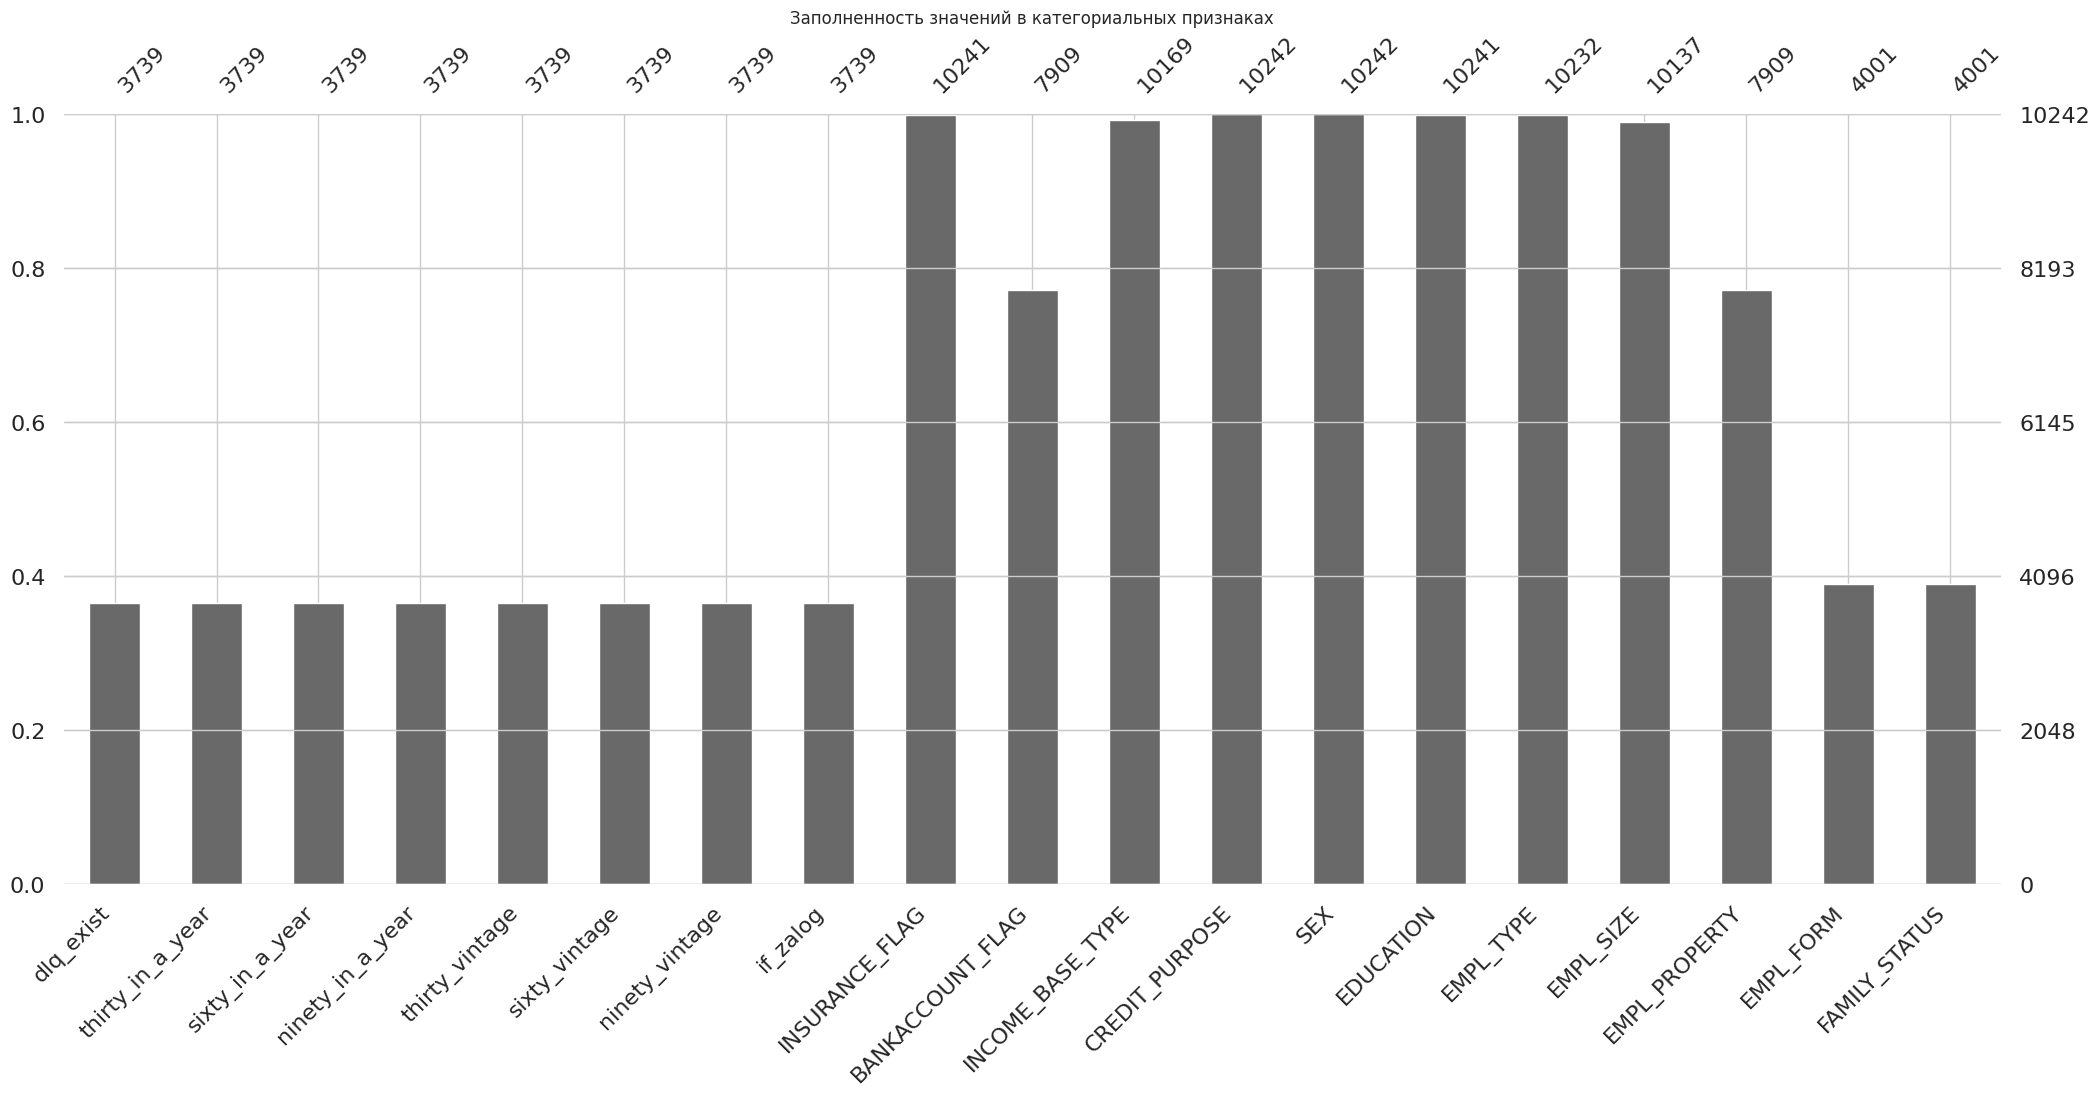

In [ ]:
# https://github.com/ResidentMario/missingno

import missingno as msno

# резюмируя, отрисуем заполненные значения (не Nan) для категориальных признаков,
# график будет показывать процент (слева) и абсолютное количество (справа и сверху) заполненных значений

categ_features = categ_features_float + categ_features_obj


sns.set(style="whitegrid")

msno.bar(df[categ_features], labels=True)

plt.title('Заполненность значений в категориальных признаках')

plt.show()


In [ ]:
# к числовым признакам относим оставшиеся признаки: 23 шт
# их смысловые значения так же можно увидеть в таблице с описанием параметров к заданию

num_features = sorted(list(set(df.columns) -  set(categ_features)))
num_features

['Active_not_cc',
 'Active_to_All_prc',
 'DEPENDANT_NUMBER',
 'DTI',
 'FULL_AGE_CHILD_NUMBER',
 'Period_at_work',
 'age',
 'all_credits',
 'avg_num_delay',
 'max14days',
 'max21days',
 'max30days',
 'max60days',
 'max90days',
 'max_MnthAfterLoan',
 'min_MnthAfterLoan',
 'numAccountActiveAll',
 'numAccountClosed',
 'num_AccountActive180',
 'num_AccountActive60',
 'num_AccountActive90',
 'own_closed',
 'sum_of_paym_months']

# Делаем проверку на:

**№1** Полноту данных по клиентам

In [ ]:
# проверка на полноту данных по категориальным признакам была произведена в предыдущей части работы,
# учтем полученные выводы в последующих заданиях
# в этой же части подробнее рассмотрим числовые признаки


In [ ]:
num_features

['Active_not_cc',
 'Active_to_All_prc',
 'DEPENDANT_NUMBER',
 'DTI',
 'FULL_AGE_CHILD_NUMBER',
 'Period_at_work',
 'age',
 'all_credits',
 'avg_num_delay',
 'max14days',
 'max21days',
 'max30days',
 'max60days',
 'max90days',
 'max_MnthAfterLoan',
 'min_MnthAfterLoan',
 'numAccountActiveAll',
 'numAccountClosed',
 'num_AccountActive180',
 'num_AccountActive60',
 'num_AccountActive90',
 'own_closed',
 'sum_of_paym_months']

**№2** Пропущенные и нулевых значения в полях

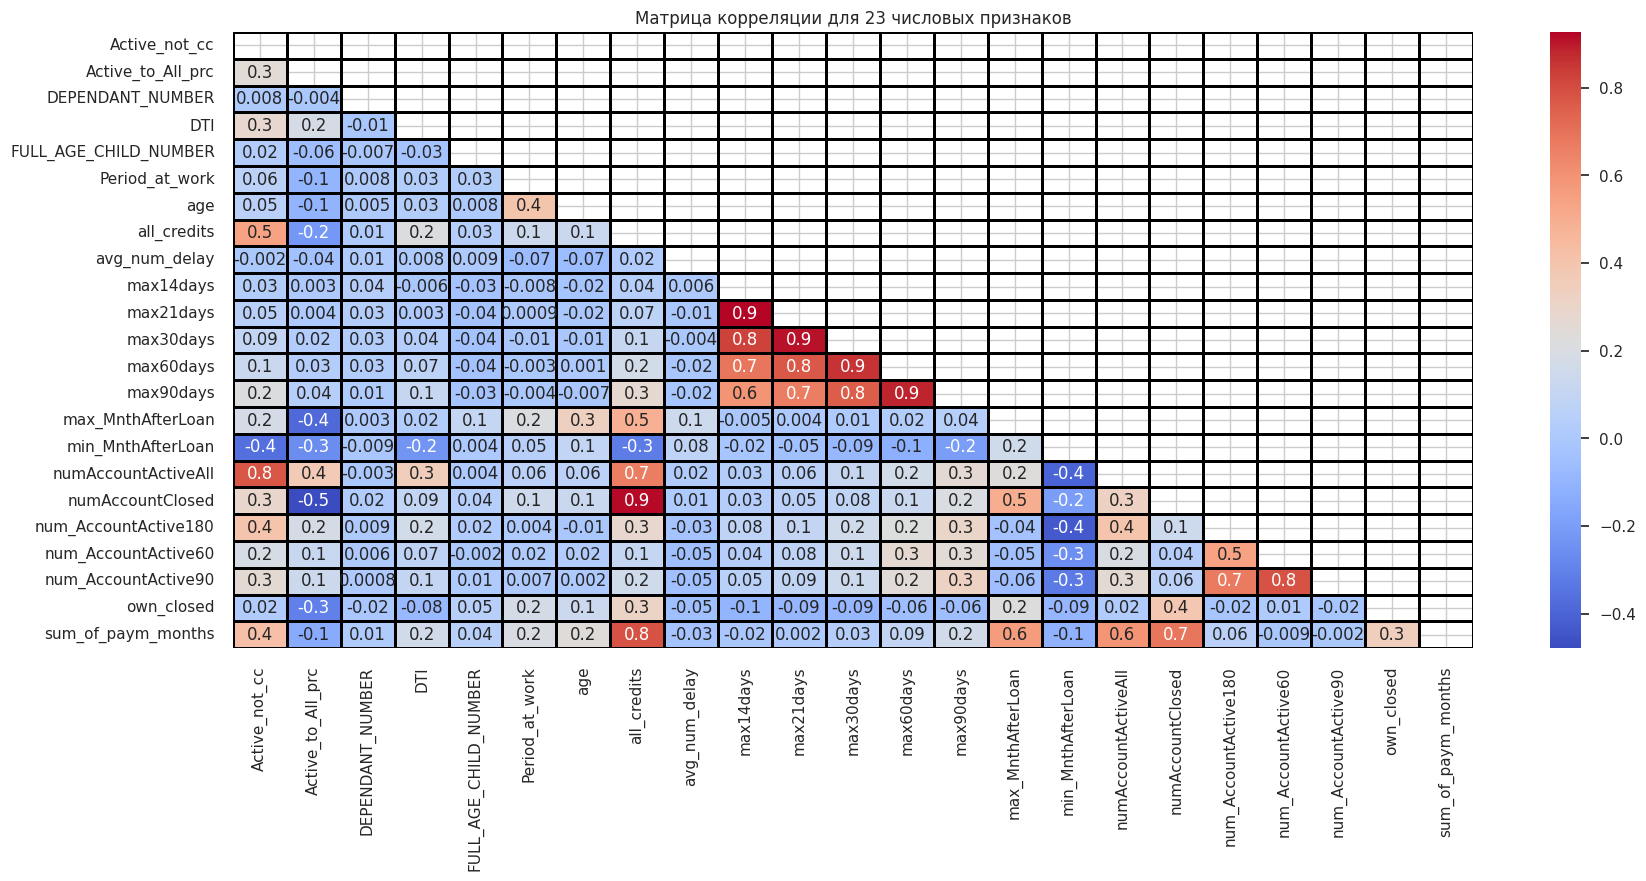

In [ ]:
# поймем связь между перемеными, используя матрицу корреляции
# без ограничения общности оставим ее нижнетреугольной

corr_matrix_num_features = df[num_features].corr()
mask = np.triu(df[num_features].corr())

plt.figure(figsize=(20, 8))
plt.title('Матрица корреляции для 23 числовых признаков')
sns.heatmap(corr_matrix_num_features, annot=True, fmt='.1g', linewidths=1, linecolor='black', mask=mask, cmap= 'coolwarm')
plt.show()

**Комментарий:**

1. Сильная положительная корреляция наблюдается между признаками, которые показывают количество запросов в бюро кредитных историй за N дней:

*   *max14days*
*   *max21days*
*   *max30days*
*   *max60days*
*   *max90days*

причем, она максимальна между двумя ближайшими датами и постепенно уменьшается,
например`corr(max14days, max21days)` > `corr(max14days, max30days)` > ... > `corr(max14days, max90days)`.

2. Схожая ситуация с признаками:

*   *num_AccountActive180*
*   *num_AccountActive90*
*   *num_AccountActive60*

3. Так же значительную положительную корреляцию можно заметить между:

*  *all_credits* & *numAccountClosed*
*  *all_credits* & *sum_of_paym_months*
*  *all_credits* & *numAccountActiveAll*
*  *Active_not_cc* & *numAccountActiveAll*
*  *sum_of_paym_months* & *numAccountClosed*


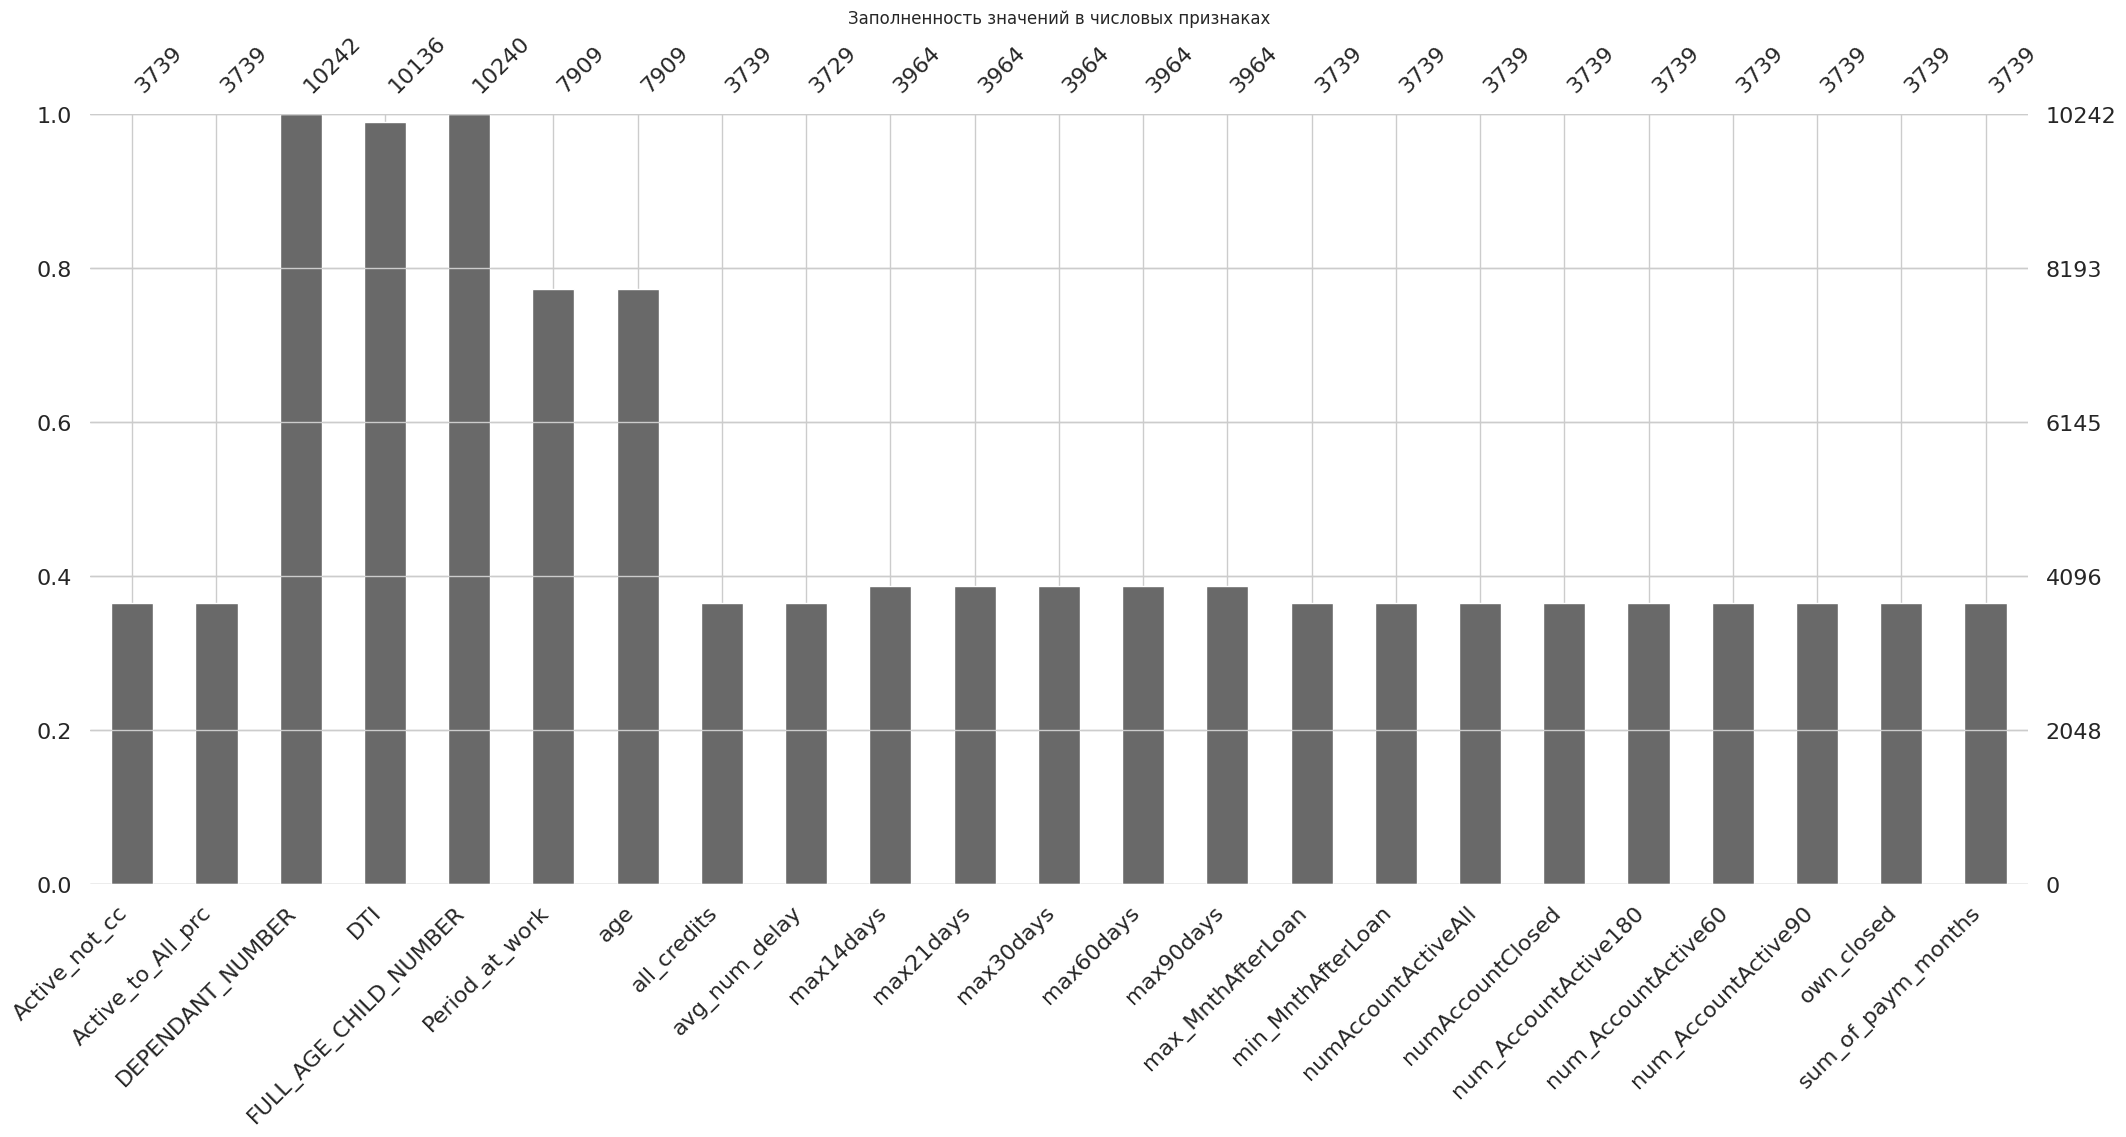

In [ ]:
# аналогично рассмотрим заполненность для числовых признаков

sns.set(style="whitegrid")

msno.bar(df[num_features], labels=True)

plt.title('Заполненность значений в числовых признаках')

plt.show()



**Комментарий**:

Видим существенное количество пропусков в числовых признаках. Лишь в нескольких заполненность составляет более половины.

**№3** Наличие некорректных знаков

In [ ]:
# найдем отрицательные числовые показатели, если такие имеются

df_num = df[num_features]
df_num[(df_num > 0).all(1)]

,Active_not_cc,Active_to_All_prc,DEPENDANT_NUMBER,DTI,FULL_AGE_CHILD_NUMBER,Period_at_work,age,all_credits,avg_num_delay,max14days,...,max90days,max_MnthAfterLoan,min_MnthAfterLoan,numAccountActiveAll,numAccountClosed,num_AccountActive180,num_AccountActive60,num_AccountActive90,own_closed,sum_of_paym_months


# Готовим итоговую витрину данных для сегментации

**№1** Корректируем даннные и исключаем клиентов с большим числом пропусков

In [ ]:
# обработка "*n.a.*" и пропусков в EDUCATION

data_mart.EDUCATION.value_counts()

высшее                                 5844
среднее-специальное                    1719
Высшее/Второе высшее/Ученая степень    1542
среднее                                 471
незаконченное высшее                    305
второе высшее                           304
*n.a.*                                   30
ученая степень                           22
Неполное среднее                          4
Name: EDUCATION, dtype: int64

In [ ]:
data_mart.EDUCATION.replace({'*n.a.*': None}, inplace=True)
data_mart.EDUCATION.value_counts()

высшее                                 5844
среднее-специальное                    1719
Высшее/Второе высшее/Ученая степень    1542
среднее                                 471
незаконченное высшее                    305
второе высшее                           304
ученая степень                           22
Неполное среднее                          4
Name: EDUCATION, dtype: int64

In [ ]:
data_mart.dropna(subset=['EDUCATION'], inplace=True)

In [ ]:
# обработка "*n.a.*", пропусков и пары  {">100", ">=100"} в EMPL_SIZE

data_mart.EMPL_SIZE.value_counts()

>250      6368
< 50      1409
>=50      1002
>100       399
>=200      343
>=150      338
>=100      246
*n.a.*       2
Name: EMPL_SIZE, dtype: int64

In [ ]:
data_mart.EMPL_SIZE.replace({'*n.a.*': None, '>100': '>=100'}, inplace=True)
data_mart.EMPL_SIZE.value_counts()

>250     6368
< 50     1409
>=50     1002
>=100     645
>=200     343
>=150     338
Name: EMPL_SIZE, dtype: int64

In [ ]:
data_mart.dropna(subset=['EMPL_SIZE'], inplace=True)

In [ ]:
# приводим значения BANKACCOUNT_FLAG к виду
# ( 0 - нет онлайн -кабинета , 1 - есть один онлайн-кабинет, 2 и более - заходил в онлайн кабинет с другого устройства )

data_mart.BANKACCOUNT_FLAG.value_counts()

0.0    6157
1.0     948
3.0     669
4.0       3
Name: BANKACCOUNT_FLAG, dtype: int64

In [ ]:
data_mart.BANKACCOUNT_FLAG.replace({3.0: 2.0, 4.0: 2.0}, inplace=True)
data_mart.BANKACCOUNT_FLAG.value_counts()

0.0    6157
1.0     948
2.0     672
Name: BANKACCOUNT_FLAG, dtype: int64

In [ ]:
# удаление пропусков в EMPL_FORM и FAMILY_STATUS

data_mart.dropna(subset=['EMPL_FORM', 'FAMILY_STATUS'], inplace=True)

In [ ]:
categ_features

['dlq_exist',
 'thirty_in_a_year',
 'sixty_in_a_year',
 'ninety_in_a_year',
 'thirty_vintage',
 'sixty_vintage',
 'ninety_vintage',
 'if_zalog',
 'INSURANCE_FLAG',
 'BANKACCOUNT_FLAG',
 'INCOME_BASE_TYPE',
 'CREDIT_PURPOSE',
 'SEX',
 'EDUCATION',
 'EMPL_TYPE',
 'EMPL_SIZE',
 'EMPL_PROPERTY',
 'EMPL_FORM',
 'FAMILY_STATUS']

In [ ]:
# удаление проспусков в оставшихся категориальных признаках

data_mart.dropna(subset=['dlq_exist',
                        'thirty_in_a_year',
                        'sixty_in_a_year',
                        'ninety_in_a_year',
                        'thirty_vintage',
                        'sixty_vintage',
                        'ninety_vintage',
                        'if_zalog'],
                 inplace=True)

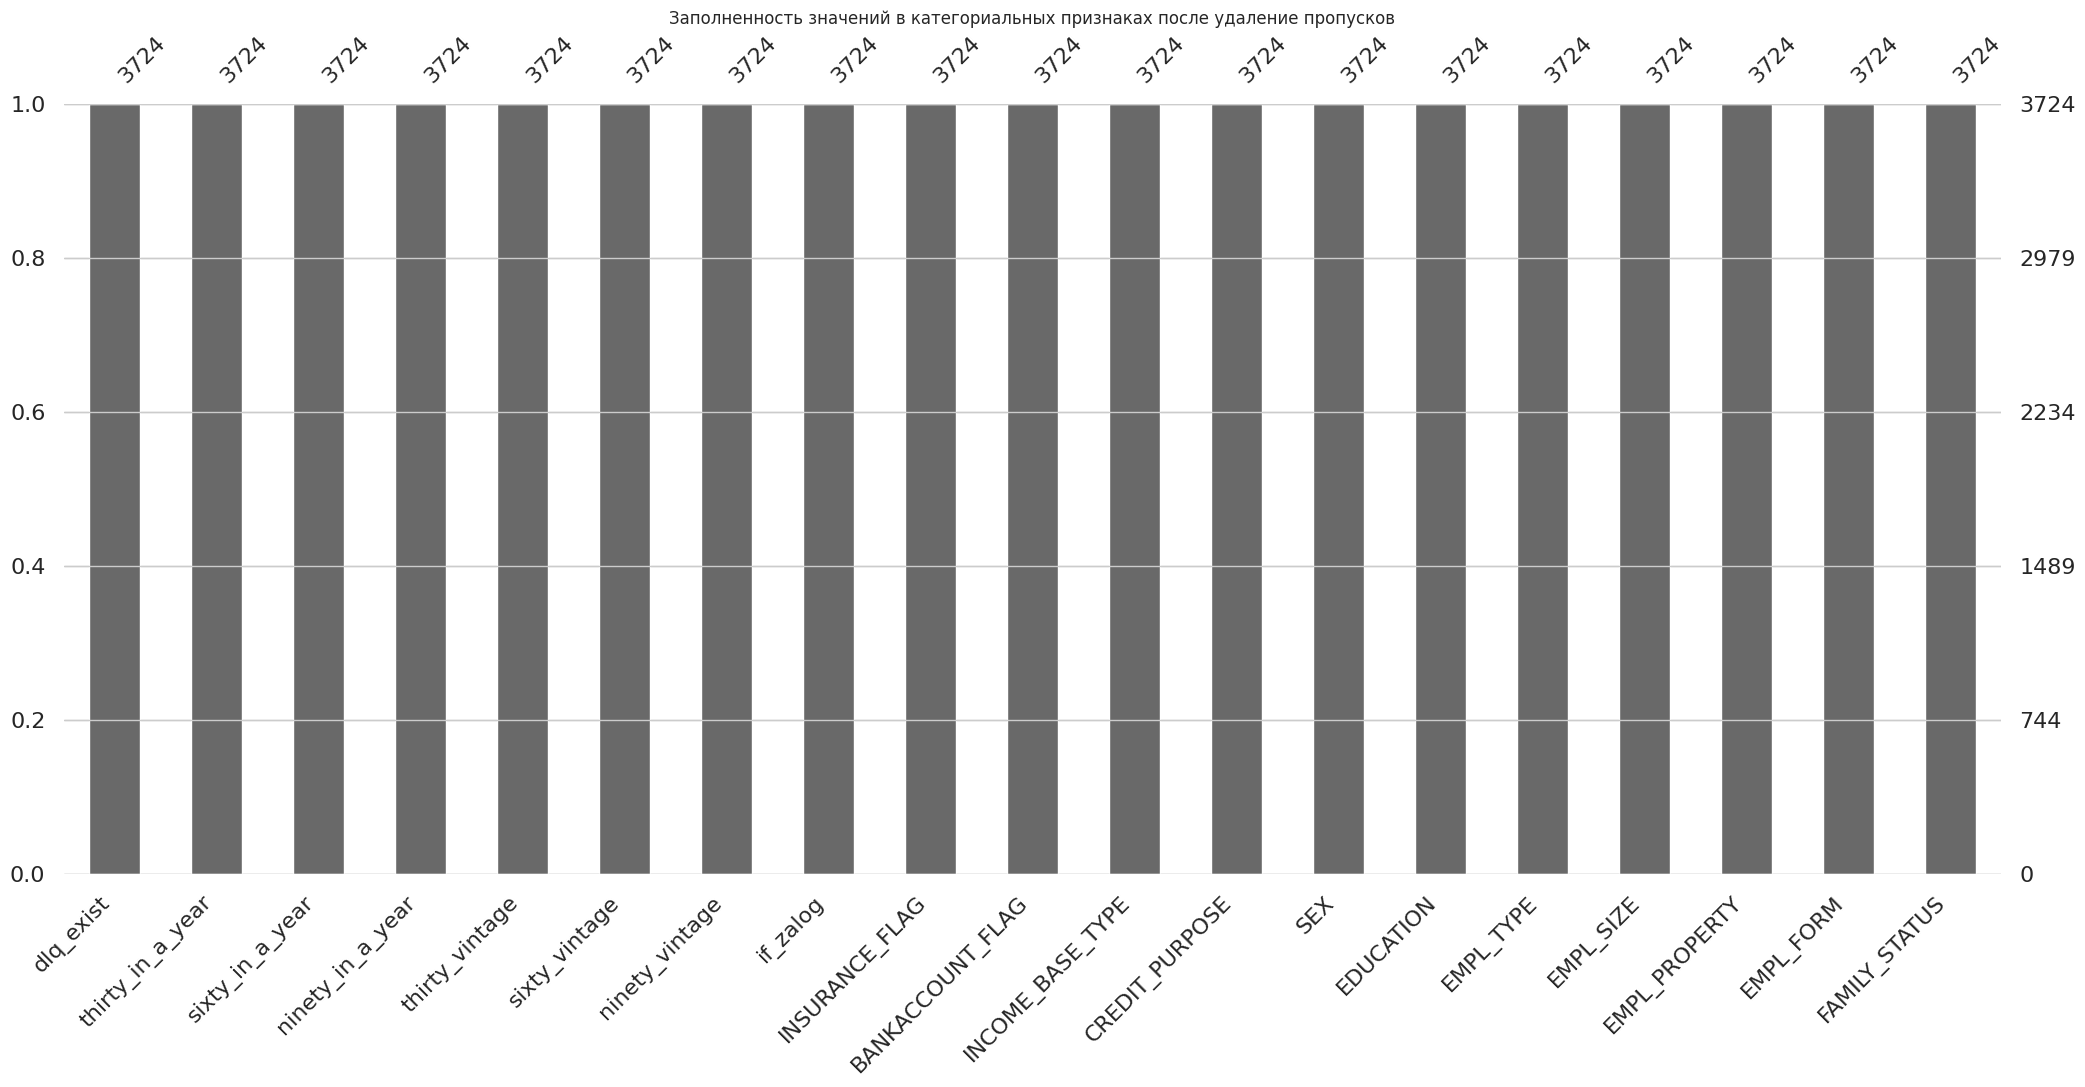

In [ ]:

msno.bar(data_mart[categ_features], labels=True)

plt.title('Заполненность значений в категориальных признаках после удаление пропусков')

plt.show()

**Комментарий:**

По графику видно, что удалось добиться наибольшей полноты для категориальных признаков по каждому из заемщиков.

**№2** Восстанавливаем пропущенные значения у числовых признаков

In [ ]:
# заменим пропуски средним и получим максимальную полноту данных по клиентам

for feature in num_features:
    data_mart[feature] = data_mart[feature].fillna(data_mart[feature].mean())


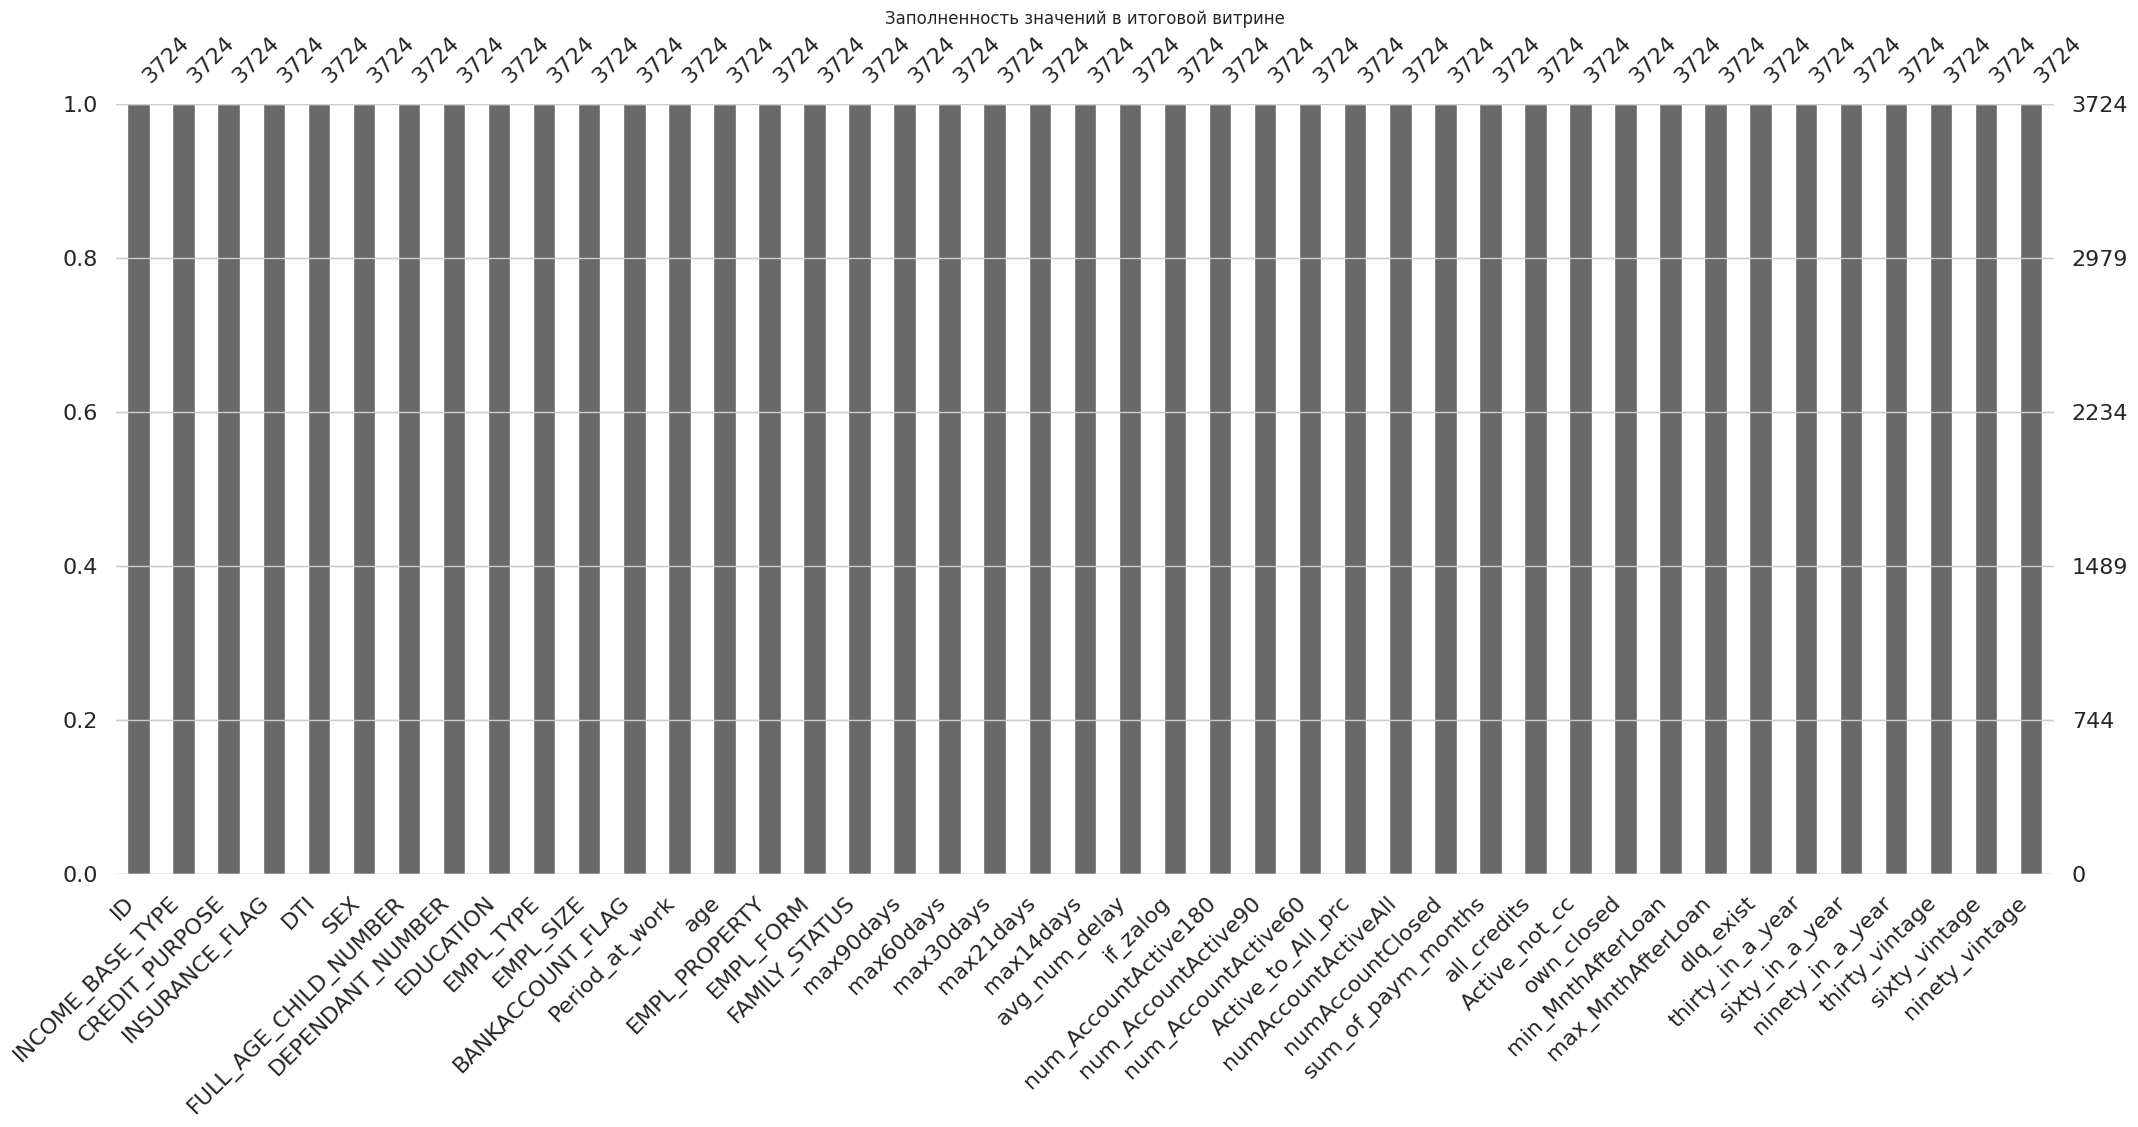

In [ ]:
msno.bar(data_mart, labels=True)

plt.title('Заполненность значений в итоговой витрине')

plt.show()

In [ ]:
# витрина

data_mart

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
2,1000059,Форма банка (без печати работодателя),Ремонт,1.0,0.49,женский,0.0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,...,0.0,26.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000079,Поступление зарплаты на счет,Ремонт,1.0,0.54,женский,0.0,0,высшее,специалист,...,0.0,18.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1000139,Форма банка (без печати работодателя),Лечение,0.0,0.29,мужской,0.0,0,среднее-специальное,специалист,...,0.0,4.0,98.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1000179,Поступление зарплаты на счет,Ремонт,0.0,0.39,мужской,2.0,0,второе высшее,менеджер среднего звена,...,1.0,1.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1000199,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.49,мужской,1.0,0,Высшее/Второе высшее/Ученая степень,специалист,...,0.0,1.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,1204599,2НДФЛ,Покупка автомобиля,0.0,0.46,мужской,0.0,0,второе высшее,вспомогательный персонал,...,0.0,12.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10231,1204639,Форма банка (без печати работодателя),Покупка недвижимости/ строительство,0.0,0.38,мужской,0.0,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,...,0.0,5.0,92.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10235,1204719,Поступление зарплаты на счет,Ремонт,1.0,0.49,женский,0.0,0,высшее,специалист,...,0.0,6.0,93.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
10238,1204779,Поступление зарплаты на счет,Ремонт,0.0,0.14,мужской,0.0,0,Высшее/Второе высшее/Ученая степень,специалист,...,0.0,3.0,34.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# витрина без ID

data_mart_drop_id = data_mart.drop(columns=['ID'], axis=1)

**№3** Кодируем категориальные признаки

In [ ]:
categ_features_obj

['INCOME_BASE_TYPE',
 'CREDIT_PURPOSE',
 'SEX',
 'EDUCATION',
 'EMPL_TYPE',
 'EMPL_SIZE',
 'EMPL_PROPERTY',
 'EMPL_FORM',
 'FAMILY_STATUS']

In [ ]:
# для кодировки воспользуемся OhE

data_mart_drop_id_encoded = pd.get_dummies(data_mart_drop_id, columns=categ_features_obj)
data_mart_drop_id_encoded


# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for column in categ_features_obj:
#     data_mart_drop_id[column] = label_encoder.fit_transform(data_mart_drop_id[column])

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
2,1.0,0.49,0.0,0,0.0,16.0,29.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0
3,1.0,0.54,0.0,0,0.0,13.0,43.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
6,0.0,0.29,0.0,0,0.0,111.0,47.0,2.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,0
8,0.0,0.39,2.0,0,0.0,65.0,35.0,3.0,3.0,0.0,...,0,0,0,1,0,0,1,0,0,0
9,1.0,0.49,1.0,0,0.0,22.0,37.0,2.0,2.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,0.0,0.46,0.0,0,0.0,13.0,31.0,7.0,4.0,1.0,...,0,0,0,1,0,0,0,0,0,1
10231,0.0,0.38,0.0,0,0.0,75.0,27.0,5.0,4.0,3.0,...,0,1,0,0,0,0,0,0,0,1
10235,1.0,0.49,0.0,0,0.0,26.0,27.0,2.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
10238,0.0,0.14,0.0,0,0.0,35.0,28.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0


# Часть 2: Сегментация

# K-means

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score



In [ ]:
# нормализуем данные

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data_mart_drop_id_encoded)

In [ ]:
#  посчитаем расстояние между точками данных и центрами кластеров, к которым эти точки принадлежат

%%time

distortions = []

K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    print('{} / {}'.format(k, distortions[-1]))

1 / 8.721689754952868
2 / 8.530681851769328
3 / 8.400270154591528
4 / 8.296108640708319
5 / 8.20129365629459
6 / 8.124182478640975
7 / 8.05393966500693
8 / 8.029519169899533
9 / 7.97961331010004
CPU times: user 31.2 s, sys: 13.5 s, total: 44.7 s
Wall time: 25.4 s


**№1** Определим оптимальное значение K, используя разные подходы

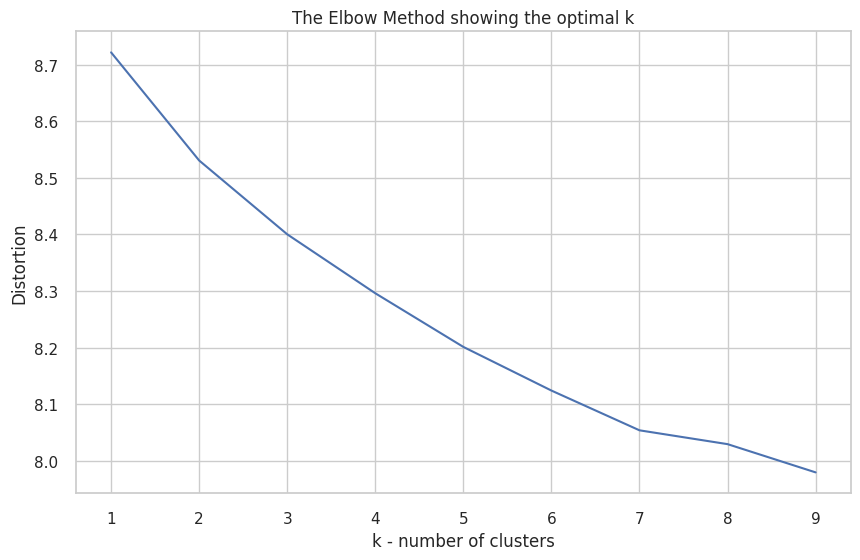

In [ ]:
# Elbow Method

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

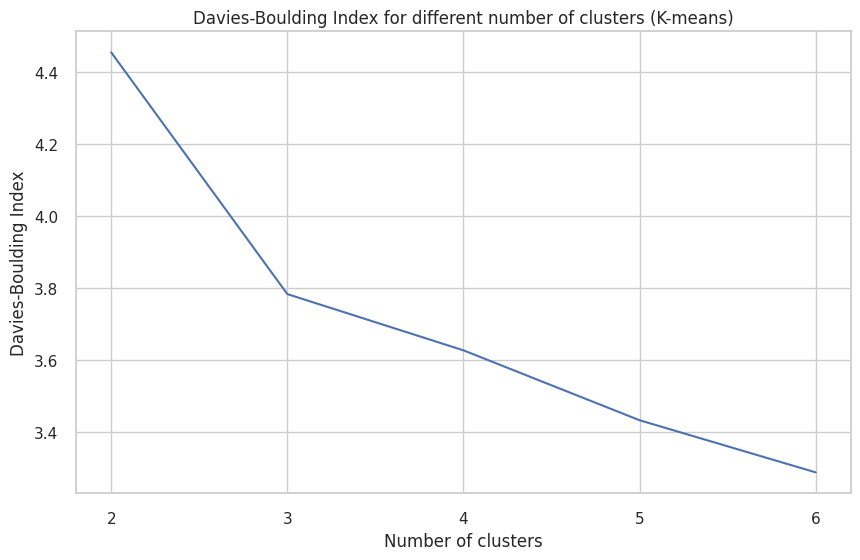

In [ ]:
# Davies-Boulding Index

results_db_kmeans = {}
for i in range(2, 7):

    kmeans = KMeans(n_clusters = i, n_init=20)
    labels = kmeans.fit_predict(X)

    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

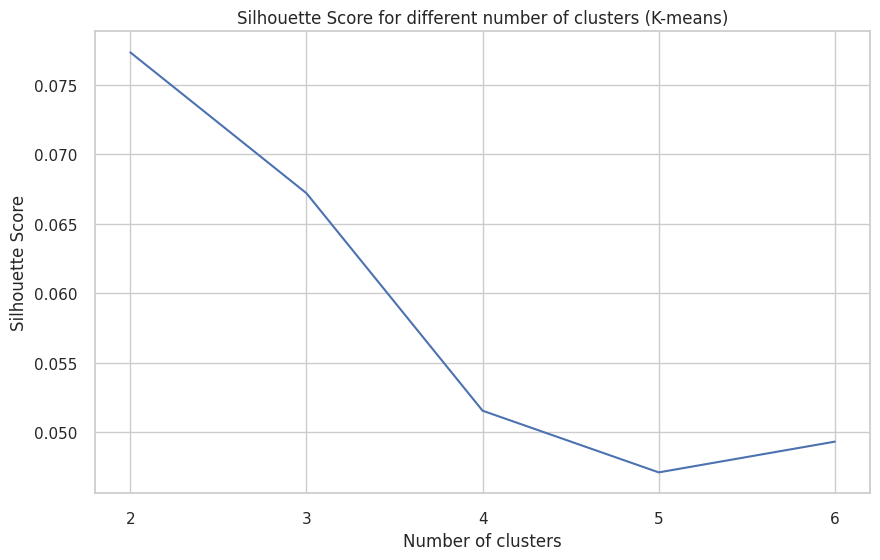

In [ ]:
# Silhouette Score

results_sil_kmeans = {}
for i in range(2, 7):

    kmeans = KMeans(n_clusters = i, n_init=20)
    labels = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, labels)
    results_sil_kmeans.update({i: sil_score})
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

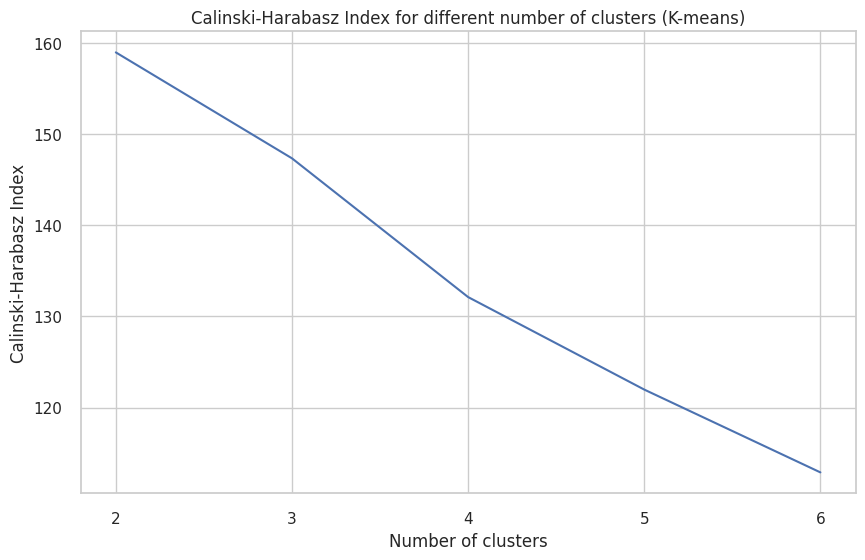

In [ ]:
# Calinski-Harabasz Index

results_ch_kmeans = {}
for i in range(2, 7):

    kmeans = KMeans(n_clusters = i, n_init=20)
    labels = kmeans.fit_predict(X)

    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (K-means)')
plt.show()

**Комментарий:**

Ни один из методов не выделил должным образом ответ, попробуем визуализировать кластеры при различном K.

In [ ]:
# уменьшим размерность данных двумя способами, сохраняя при этом как можно больше информации

Y_pca = PCA(n_components=2).fit_transform(X);
Y_svd = TruncatedSVD(n_components=2).fit_transform(X);

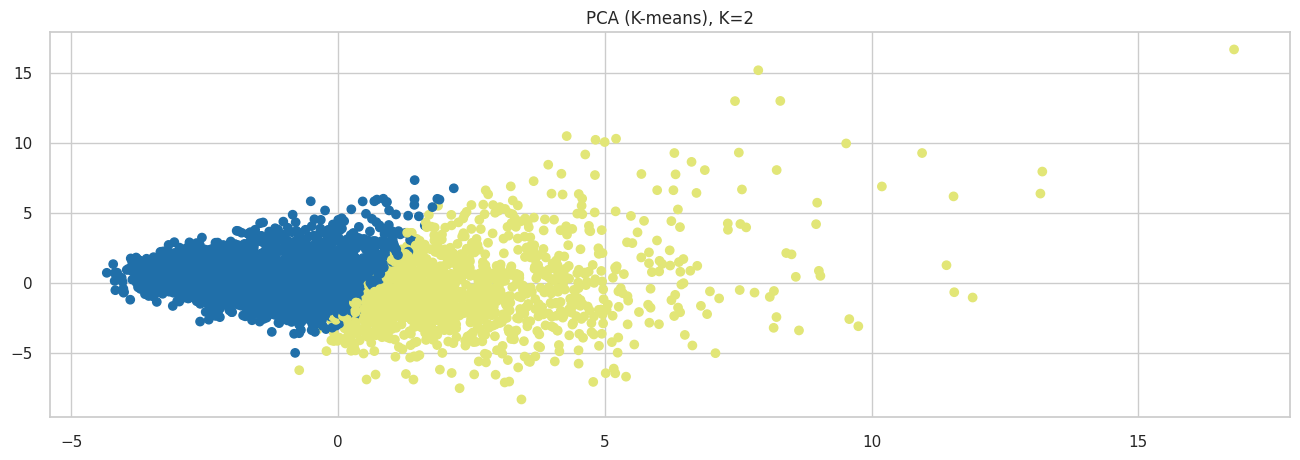

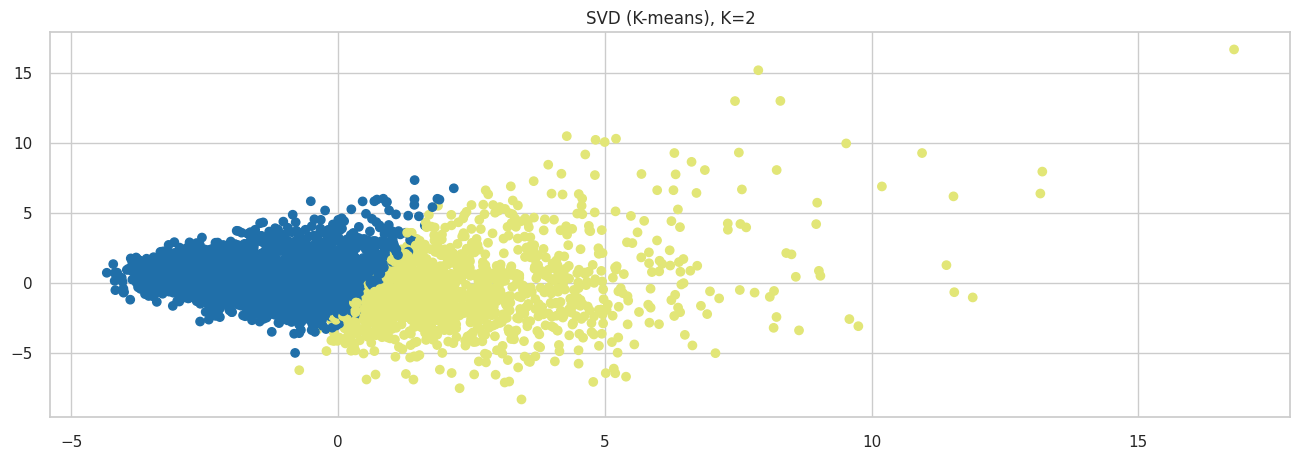

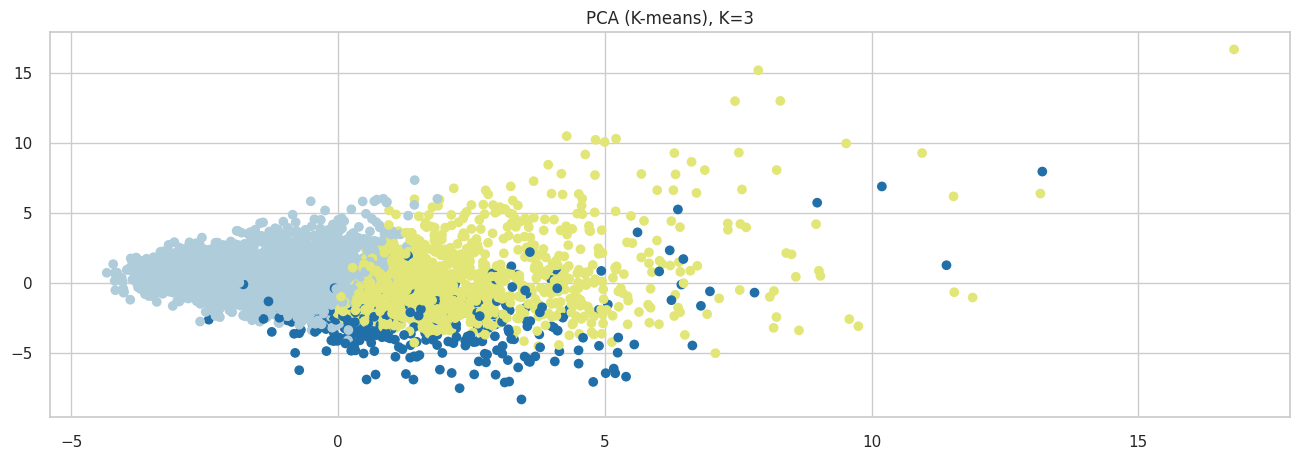

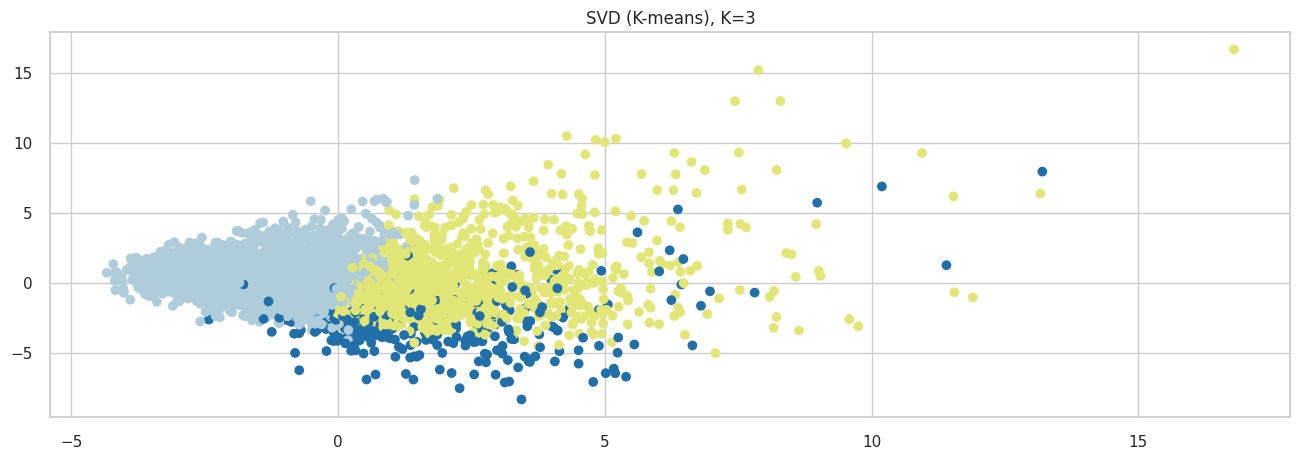

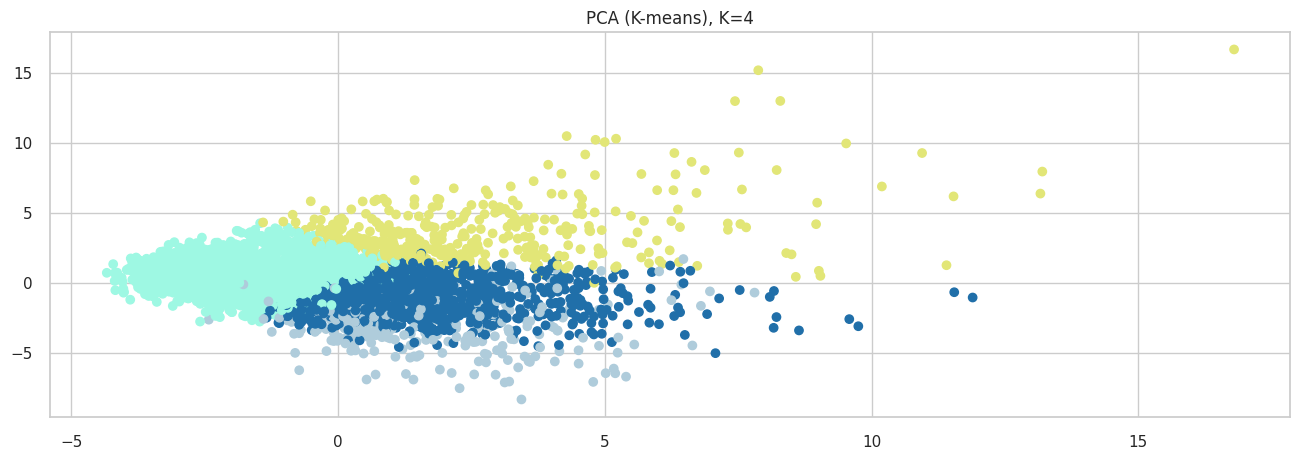

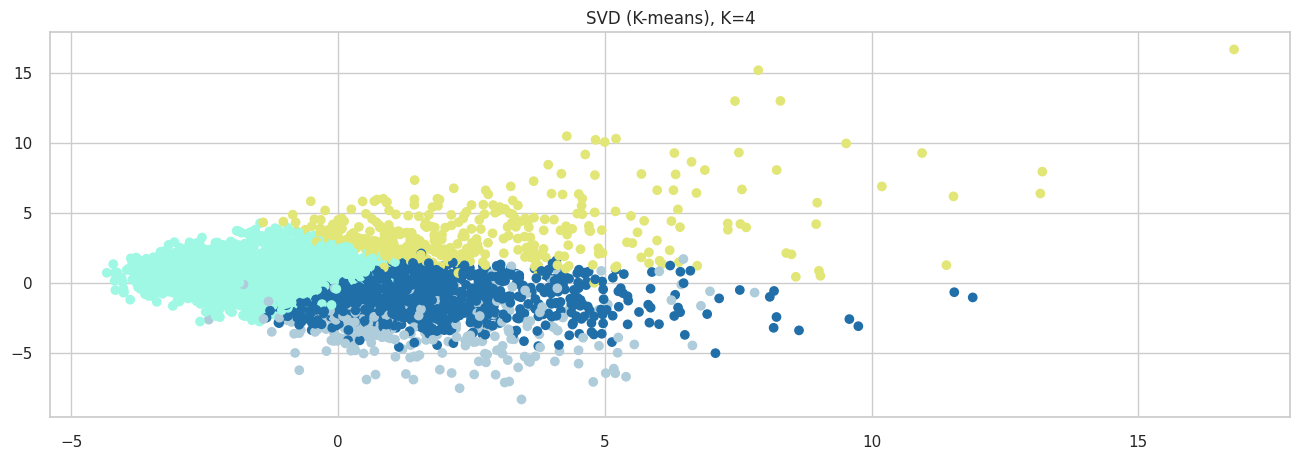

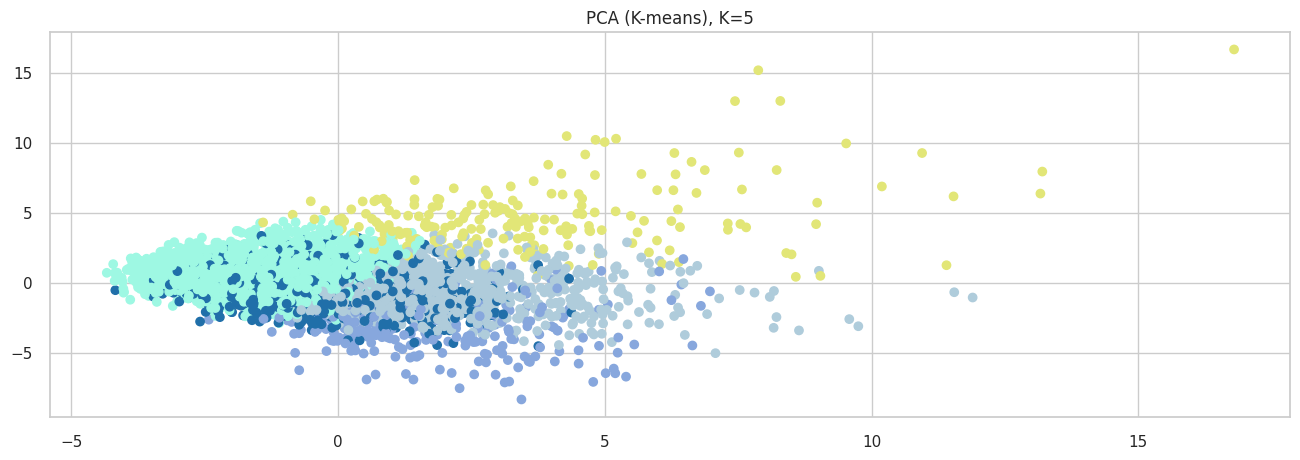

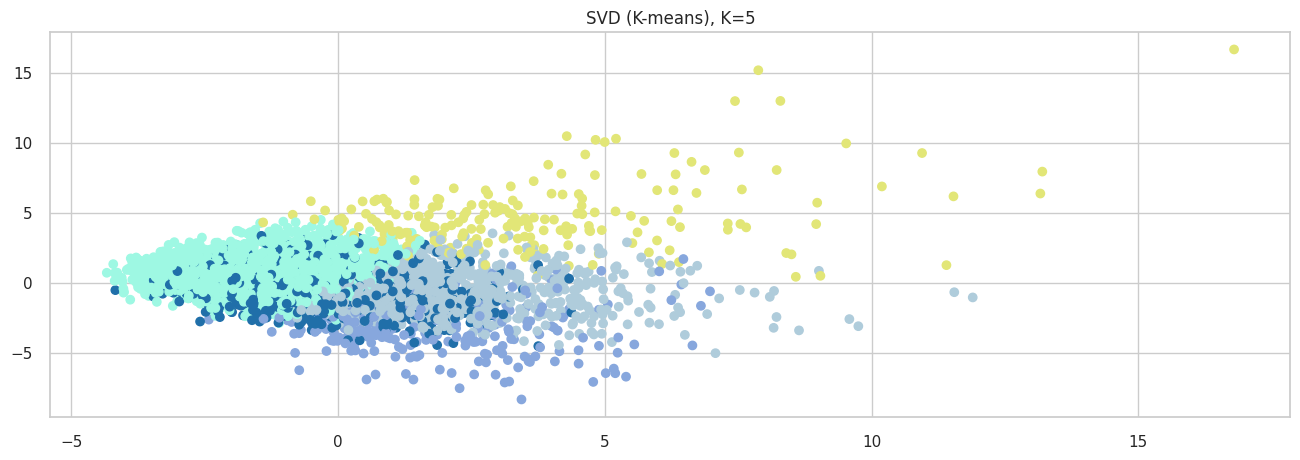

In [ ]:

for k in range(2, 6):
  kmeanModel = KMeans(n_clusters=k, n_init=20).fit(X)

  np.random.seed(21)
  colors = np.sqrt(np.random.randint(0,255, size=(k, 3))/255)
  c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

  plt.figure(figsize=(16,5));
  plt.title(f'PCA (K-means), K={k}')
  plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

  plt.figure(figsize=(16,5)); plt.title(f'SVD (K-means), K={k}')
  plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);
  plt.show()

  print('\n')

**Комментарий:**

Согласно графикам выше, можно сказазать, что оптимальное K = 4.

**№2** А что внутри ? Или же интерпретация кластеров

In [ ]:
K = 4
best_kmeanModel = KMeans(n_clusters=K, n_init=20).fit(X)


In [ ]:
# сопоставим метки для каждого объекта

data_mart['Labels'] = best_kmeanModel.labels_

In [ ]:
# разделим кластеры на разные df

df_0 = data_mart[(data_mart['Labels'] == 0)]
df_1 = data_mart[(data_mart['Labels'] == 1)]
df_2 = data_mart[(data_mart['Labels'] == 2)]
df_3 = data_mart[(data_mart['Labels'] == 3)]

In [ ]:
# рассчитаем среднее значение по каждому числовому признаку

df_0_mean = pd.DataFrame(df_0[num_features].mean())
df_1_mean = pd.DataFrame(df_1[num_features].mean())
df_2_mean = pd.DataFrame(df_2[num_features].mean())
df_3_mean = pd.DataFrame(df_3[num_features].mean())

combined_means = pd.concat([df_0_mean, df_1_mean, df_2_mean, df_3_mean], axis=1)

combined_means.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

combined_means

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Active_not_cc,0.651826,1.565574,1.108949,1.731397
Active_to_All_prc,0.447007,0.517122,0.345082,0.372565
DEPENDANT_NUMBER,0.004502,0.016393,0.003891,0.005445
DTI,0.367544,0.428224,0.395097,0.416316
FULL_AGE_CHILD_NUMBER,0.504252,0.491803,0.579767,0.620275
Period_at_work,49.678339,53.833333,48.949416,72.492740
age,34.284642,35.243169,35.704280,39.354809
all_credits,3.456228,6.527322,6.964981,9.353902
avg_num_delay,0.040472,0.039574,0.285863,0.051860
max14days,0.269865,2.051913,0.365759,0.295826


In [ ]:
# сводка по категориальным признакам для кластера 0

pd.DataFrame(df_0[categ_features].describe(include='all').T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dlq_exist,1999.0,NaN,NaN,NaN,0.392696,0.488472,0.0,0.0,0.0,1.0,1.0
thirty_in_a_year,1999.0,NaN,NaN,NaN,0.051026,0.220105,0.0,0.0,0.0,0.0,1.0
sixty_in_a_year,1999.0,NaN,NaN,NaN,0.006503,0.0804,0.0,0.0,0.0,0.0,1.0
ninety_in_a_year,1999.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thirty_vintage,1999.0,NaN,NaN,NaN,0.004502,0.066964,0.0,0.0,0.0,0.0,1.0
sixty_vintage,1999.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ninety_vintage,1999.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
if_zalog,1999.0,NaN,NaN,NaN,0.22061,0.414762,0.0,0.0,0.0,0.0,1.0
INSURANCE_FLAG,1999.0,NaN,NaN,NaN,0.601801,0.489649,0.0,0.0,1.0,1.0,1.0
BANKACCOUNT_FLAG,1999.0,NaN,NaN,NaN,0.262631,0.569986,0.0,0.0,0.0,0.0,2.0


**Комментарий:**

Кластер 0: Не любитель  кредитов, мало платит, потому что мало банковских продуктов, о чем свидетельствуют показатели. Если берет кредит, то платит без задержек.

*   Пол: женский
*   Образование: высшее
*   Должность: специалист
*   Зарплата: >250
*   Всего кредитов: 3.4
*   Кол-во задержки оплаты: 0.04
*   Кол-во активных счетов счетов за последние 180 дней: 0.23
*   Минимальное кол-во месяцев, которое прошло с момета взятия прошлого кредита: 17
*   Сумма платежей за последний месяц (тыс.): 45

In [ ]:
# сводка по категориальным признакам для кластера 1

pd.DataFrame(df_1[categ_features].describe(include='all').T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dlq_exist,366.0,NaN,NaN,NaN,0.464481,0.49942,0.0,0.0,0.0,1.0,1.0
thirty_in_a_year,366.0,NaN,NaN,NaN,0.092896,0.290684,0.0,0.0,0.0,0.0,1.0
sixty_in_a_year,366.0,NaN,NaN,NaN,0.046448,0.210742,0.0,0.0,0.0,0.0,1.0
ninety_in_a_year,366.0,NaN,NaN,NaN,0.021858,0.14642,0.0,0.0,0.0,0.0,1.0
thirty_vintage,366.0,NaN,NaN,NaN,0.019126,0.137154,0.0,0.0,0.0,0.0,1.0
sixty_vintage,366.0,NaN,NaN,NaN,0.002732,0.052271,0.0,0.0,0.0,0.0,1.0
ninety_vintage,366.0,NaN,NaN,NaN,0.002732,0.052271,0.0,0.0,0.0,0.0,1.0
if_zalog,366.0,NaN,NaN,NaN,0.265027,0.441952,0.0,0.0,0.0,1.0,1.0
INSURANCE_FLAG,366.0,NaN,NaN,NaN,0.669399,0.471074,0.0,0.0,1.0,1.0,1.0
BANKACCOUNT_FLAG,366.0,NaN,NaN,NaN,0.472678,0.753488,0.0,0.0,0.0,1.0,2.0


**Комментарий:**

Кластер 1: У клиента много кредитов, из них мало закрытых, платит без задержки, много аквтивных счетов.

*   Пол: женский
*   Должность: специалист
*   Цель: ремонт
*   Образование: высшее
*   Кол-во активных счетов счетов за последние 180 дней: 1.1
*   Кол-во кредитов: 6.5
*   Кол-во закрытых кредитов: 0.3
*   Отношение активных счетов ко всем счетам: 0.5
*   Среднее кол-во задержки оплаты: 0.03



In [ ]:
# сводка по категориальным признакам для кластера 2

pd.DataFrame(df_2[categ_features].describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dlq_exist,257.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
thirty_in_a_year,257.0,NaN,NaN,NaN,0.988327,0.107619,0.0,1.0,1.0,1.0,1.0
sixty_in_a_year,257.0,NaN,NaN,NaN,0.976654,0.151295,0.0,1.0,1.0,1.0,1.0
ninety_in_a_year,257.0,NaN,NaN,NaN,0.840467,0.366887,0.0,1.0,1.0,1.0,1.0
thirty_vintage,257.0,NaN,NaN,NaN,0.303502,0.460667,0.0,0.0,0.0,1.0,1.0
sixty_vintage,257.0,NaN,NaN,NaN,0.18677,0.390488,0.0,0.0,0.0,0.0,1.0
ninety_vintage,257.0,NaN,NaN,NaN,0.210117,0.408186,0.0,0.0,0.0,0.0,1.0
if_zalog,257.0,NaN,NaN,NaN,0.276265,0.448022,0.0,0.0,0.0,1.0,1.0
INSURANCE_FLAG,257.0,NaN,NaN,NaN,0.669261,0.471397,0.0,0.0,1.0,1.0,1.0
BANKACCOUNT_FLAG,257.0,NaN,NaN,NaN,0.229572,0.542906,0.0,0.0,0.0,0.0,2.0


**Комментарий:**


Кластер 2: Клиент, у коготоро много кредитов, высокая задержка, брали последний кредит давно

*   Пол: женский
*   Должность: специалист
*   Зарплата: >250
*   Количество кредитов: 6.9
*   Кол-во месяцев прошеднее с момента выдачи первого кредита: 81
*   Среднее кол-во задержки оплаты: 0.28
*   Кол-во месяцев, которое прошло с момета взятия прошлого кредита: 15

In [ ]:
# сводка по категориальным признакам для кластера 3

pd.DataFrame(df_3[categ_features].describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dlq_exist,1102.0,NaN,NaN,NaN,0.800363,0.399909,0.0,1.0,1.0,1.0,1.0
thirty_in_a_year,1102.0,NaN,NaN,NaN,0.137024,0.344028,0.0,0.0,0.0,0.0,1.0
sixty_in_a_year,1102.0,NaN,NaN,NaN,0.027223,0.162807,0.0,0.0,0.0,0.0,1.0
ninety_in_a_year,1102.0,NaN,NaN,NaN,0.000907,0.030124,0.0,0.0,0.0,0.0,1.0
thirty_vintage,1102.0,NaN,NaN,NaN,0.013612,0.115925,0.0,0.0,0.0,0.0,1.0
sixty_vintage,1102.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ninety_vintage,1102.0,NaN,NaN,NaN,0.002722,0.052128,0.0,0.0,0.0,0.0,1.0
if_zalog,1102.0,NaN,NaN,NaN,0.532668,0.499158,0.0,0.0,1.0,1.0,1.0
INSURANCE_FLAG,1102.0,NaN,NaN,NaN,0.601633,0.489784,0.0,0.0,1.0,1.0,1.0
BANKACCOUNT_FLAG,1102.0,NaN,NaN,NaN,0.131579,0.41533,0.0,0.0,0.0,0.0,2.0


**Комментарий:**

Кластер 3: платежеспособный и семейный человек, работает, исправно и много платит.

*   Образование: высшее
*   Должность: менеджер среднего звена
*   Семейный статус: женат
*   Зарплата: >250
*   Время работы (кол-во дней): 72
*   Кол-во кредитов: 9
*   Кол-во задержки оплаты: 0.05
*   Сумма платежей за последний месяц (тыс.): 145

**№3** А почему ?!

  Алгоритм кластеризации K-means был выбран мной по причине простоты его имплементации и интерпретации (интерпретация очень важна в задачах подобного рода). К тому же этот алгоритм работает без размеченных данных. В начале захотелось попробовать бустинг, но в наших данных нет целевой переменной, к сожалению. А учить нейронную сеть кажется полным абсурдом для такой задачи.